<a href="https://colab.research.google.com/github/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/blob/main/analisis_de_datos_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color = 'FD6F96'>📈 Proyecto BEDU - Fase III - Módulo 1 - Análisis de Datos con Python Santander 2021</font>**

**Equipo 9:**
- Dávila Osorio Javier Ibzan 
- Díaz Lievano Lázaro Raúl
- García Ruiz Diana Isabel
- Ortega Estrada Ismael
- Pizano Ocampo Aranza Nayeli
- Sánchez Loperena Rubén

## **<font color = 'FFEBA1'>Enfermedades cardiovasculares**</font>
Las enfermedades cardiovasculares constituyen la primera causa de muerte en el mundo y se prevé que lo sigan siendo, debido al envejecimiento de la población y la prevalencia de dichas enfermedades en países de bajos recursos. Las enfermedades cardiovasculares son enfermedades del sistema circulatorio, de etiología y localización diversas. Se clasifican en cuatro tipos generales:
* Enfermedades isquémicas del corazón 
* Enfermedades cerebrovasculares 
* Enfermedades vasculares periféricas 
* Otras enfermedades. 

Las dos primeras, las de importancia mayor en magnitud, son responsables de más del 60% de la mortalidad cardiovascular total. Suelen manifestarse como fenómenos agudos. Se deben, sobre todo, a la obstrucción de los vasos, que impide que la sangre fluya hacia el corazón o el cerebro y termina produciendo la muerte.

Las enfermedades vasculares periféricas afectan a las arterias o a las venas que irrigan las piernas y los brazos. Provocan dificultades para la circulación de la sangre y comportan estrechamiento de los vasos, hinchazón y dolor. Pueden causar isquemia. Cuando afectan a las venas se forman coágulos (trombos) que dan
lugar a trombosis venosa.
Entre las "otras enfermedades cardiovasculares" destacan las cardiopatías congénitas y la cardiopatía reumática.

Las enfermedades cardiovasculares constituyen la primera causa de mortalidad afectando tanto a países desarrollados como a los de bajo desarrollo. En el trastorno cardiovascular interactúan tanto la susceptibilidad genética del individuo como los factores ambientales (tabaquismo,sedentarismo y dieta).

El riesgo cardiovascular se define como la probabilidad de padecer un evento cardiovascular en un determinado período. La predicción del riesgo cardiovascular ha constituido, en los últimos años, la piedra angular en las guías clínicas de prevención cardiovascular, y deviene una herramienta útil del Médico de Familia para establecer prioridades en la atención primaria, mejorando la atención a los pacientes y eligiendo más eficazmente la terapéutica a seguir, con el objetivo de acercarnos más a la realidad multifactorial de las enfermedades cardiovasculares y a su prevención.

<center><img src = 'https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/enf_cardio.bmp'/></center>

## Importación de librerías

Comenzamos este proyecto con un bloque de todas las librerias que usamos a lo largo de nuestro jupyter Notebook

In [ ]:
import pandas as pd

from scipy import stats
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

import pprint as pp

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate

import plotly.express as px

from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
nltk.download('vader_lexicon')

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import roc_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



## Dataset 

El Colab para la limpieza del Dataset se encuentra aquí: https://github.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/blob/main/limpieza_dataset.ipynb

La documentación de nuestro Dataset se encuentra aquí: https://github.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/blob/main/Files/Documentaci%C3%B3n%20-%20Fase%20III%20-%20Proyecto%201.pdf

Posteriormente cargamos el dataset de enfermedades cardiovasculares  a través de un enlace de github, este data set contiene 70 000 registros y 13 campos donde encontramos datos de tipo númericas y catégoricas

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/enfermedades_cardiovasculares.csv', index_col = 0)

df.head()

edad  genero  estatura  ...  alcohol  act_fisica  enfermedad_cardiovascular
0    50       2       168  ...        0           1                          0
1    55       1       156  ...        0           1                          1
2    51       1       165  ...        0           0                          1
3    48       2       169  ...        0           1                          1
4    47       1       156  ...        0           0                          0

[5 rows x 13 columns]

## Postwork 1 - Estimados de locación y variabilidad




* Identifica las columnas de tu dataset que tengan datos numéricos.
    - edad
    - estatura
    - peso
    - imc
    - presion_sistolica
    - presion_diastolica

Para iniciar nuestro procesamiento obtenemos los estimados de locación usando la funcion ``` describe ``` transpuesta y eliminando los campos catégoricos



In [ ]:
est_loc = df.describe().T

est_loc = est_loc.drop(index = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica', 'enfermedad_cardiovascular'], columns = ['count'])

est_loc

mean         std     min  ...      50%     75%       max
edad                 52.840671    6.766774   29.00  ...   53.000   58.00     64.00
estatura            164.359229    8.210126   55.00  ...  165.000  170.00    250.00
peso                 74.205690   14.395757   10.00  ...   72.000   82.00    200.00
imc                  27.556545    6.091405    3.47  ...   26.375   30.22    298.67
presion_sistolica   128.817286  154.011419 -150.00  ...  120.000  140.00  16020.00
presion_diastolica   96.630414  188.472530  -70.00  ...   80.000   90.00  11000.00

[6 rows x 7 columns]

Para generar la tabla de estimados de locación se hizo uso de un ciclo ```for``` donde se itera dentro de una lista llamada columnas con las funciones que buscamos calcular, dentro del ciclo se usa un ```if anidado```   y se recorre cada valor de la lista de variables númericas



In [ ]:
variables_numericas = ['edad', 'estatura', 'peso', 'imc', 'presion_sistolica', 'presion_diastolica']
columnas = ['promedio', 'mediana', 'media_truncada', 'desviacion_estandar', 'rango', '25%', '50%', '75%', 'rango_intercuartil']

estimados_loc = pd.DataFrame(index = variables_numericas)

datos = []

for columna in columnas:
    if columna == 'promedio':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].mean())
        estimados_loc.insert(0, column = columna, value = datos)
    elif columna == 'mediana':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].median())
        estimados_loc.insert(1, column = columna, value = datos)
    elif columna == 'media_truncada':
        for i in range(len(variables_numericas)):
            datos.append(stats.trim_mean(df[variables_numericas[i]], 0.1))
        estimados_loc.insert(2, column = columna, value = datos)
    elif columna == 'desviacion_estandar':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].std())
        estimados_loc.insert(3, column = columna, value = datos)
    elif columna == 'rango':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].max() - df[variables_numericas[i]].min())
        estimados_loc.insert(4, column = columna, value = datos)
    elif columna == '25%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(5, column = columna, value = datos)
    elif columna == '50%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.5))
        estimados_loc.insert(6, column = columna, value = datos)
    elif columna == '75%':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.75))
        estimados_loc.insert(7, column = columna, value = datos)
    elif columna == 'rango_intercuartil':
        for i in range(len(variables_numericas)):
            datos.append(df[variables_numericas[i]].quantile(0.75) - df[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(8, column = columna, value = datos)
    datos = []

estimados_loc

promedio  mediana  ...     75%  rango_intercuartil
edad                 52.840671   53.000  ...   58.00               10.00
estatura            164.359229  165.000  ...  170.00               11.00
peso                 74.205690   72.000  ...   82.00               17.00
imc                  27.556545   26.375  ...   30.22                6.34
presion_sistolica   128.817286  120.000  ...  140.00               20.00
presion_diastolica   96.630414   80.000  ...   90.00               10.00

[6 rows x 9 columns]

## Postwork 2 - Introducción a la visualización de datos: Distribuciones

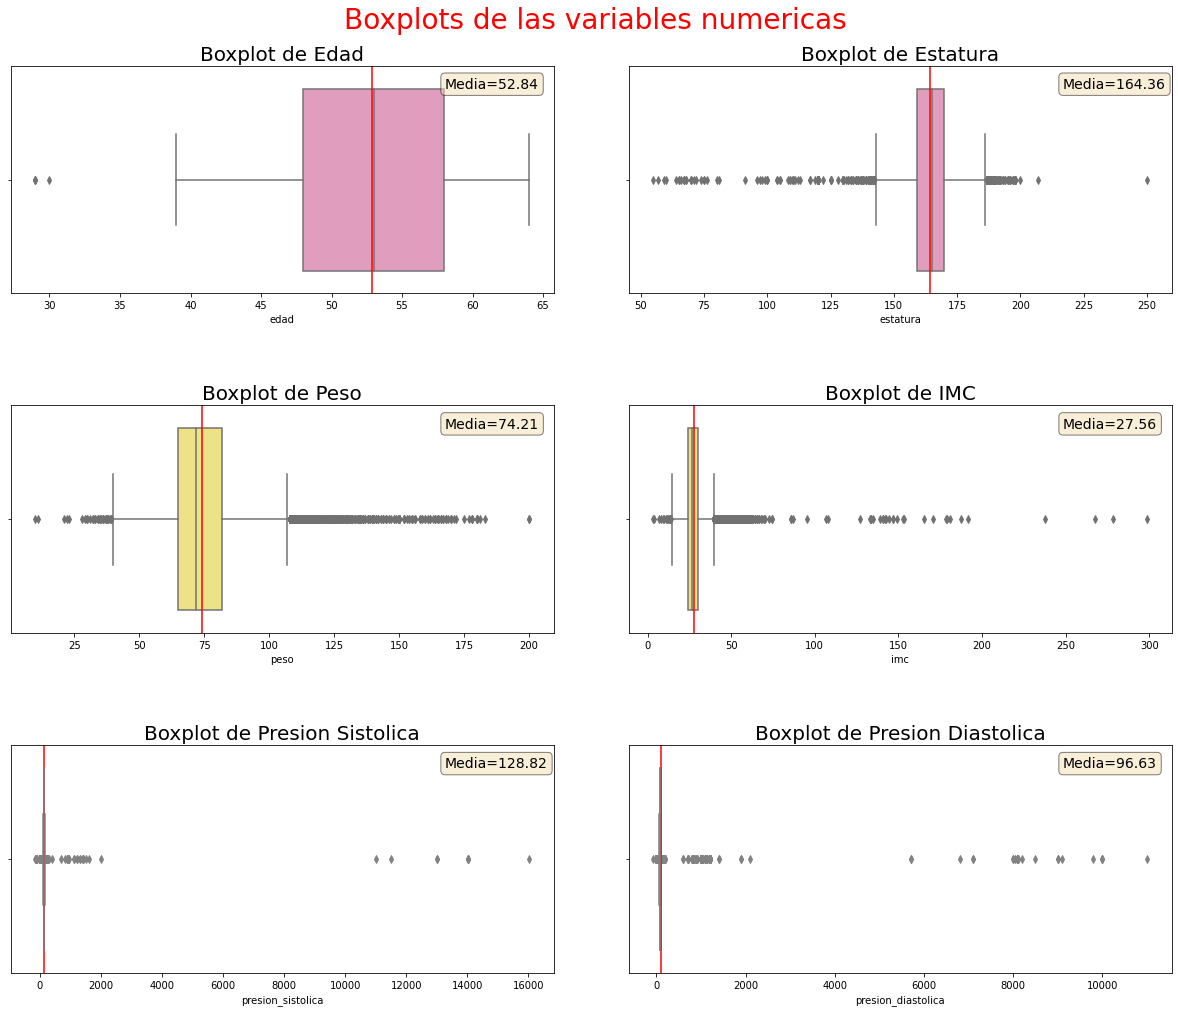

In [ ]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

palette = ['#EB92BE', '#EB92BE', '#FFEF78', '#FFEF78', '#B1FFFD', '#B1FFFD']
fig.suptitle('Boxplots de las variables numericas', fontsize=28, color= 'r');

Nombres = ['Edad', 'Estatura', 'Peso', 'IMC', 'Presion Sistolica', 'Presion Diastolica']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

i=0
for axe in axes.flat:
  media=df[variables_numericas[i]].mean()
  textstr = '\n'.join({r'Media=%.2f' % (media, )})
  sns.boxplot(x = df[variables_numericas[i]], ax = axe, color = palette[i]);
  axe.axvline(df[variables_numericas[i]].mean(), c = 'r')
  axe.set_title(f'Boxplot de {Nombres[i]}', fontsize=20);
  axe.text(.8, 0.95, textstr, transform=axe.transAxes, fontsize=14, verticalalignment='top', bbox=props)
  i += 1

fig.tight_layout(pad = 6)

In [ ]:
df.describe().T

count        mean  ...     75%       max
edad                       70000.0   52.840671  ...   58.00     64.00
genero                     70000.0    1.349571  ...    2.00      2.00
estatura                   70000.0  164.359229  ...  170.00    250.00
peso                       70000.0   74.205690  ...   82.00    200.00
imc                        70000.0   27.556545  ...   30.22    298.67
presion_sistolica          70000.0  128.817286  ...  140.00  16020.00
presion_diastolica         70000.0   96.630414  ...   90.00  11000.00
colesterol                 70000.0    1.366871  ...    2.00      3.00
glucosa                    70000.0    1.226457  ...    1.00      3.00
tabaco                     70000.0    0.088129  ...    0.00      1.00
alcohol                    70000.0    0.053771  ...    0.00      1.00
act_fisica                 70000.0    0.803729  ...    1.00      1.00
enfermedad_cardiovascular  70000.0    0.499700  ...    1.00      1.00

[13 rows x 8 columns]

In [ ]:
def filtro_IQR(serie):
  iqr = serie.quantile(0.75) - serie.quantile(0.25)
  filtrado = (serie > serie.quantile(0.25) - (iqr * 1.5)) & (serie < serie.quantile(0.75) + (iqr * 1.5))
  return filtrado

In [ ]:
df_final = df.copy()

for columna in variables_numericas:
    df_final = df_final[filtro_IQR(df_final[columna])]

In [ ]:
variables_numericas = ['edad', 'estatura', 'peso', 'imc', 'presion_sistolica', 'presion_diastolica']
columnas = ['promedio', 'mediana', 'media_truncada', 'desviacion_estandar', 'rango', '25%', '50%', '75%', 'rango_intercuartil']

estimados_loc = pd.DataFrame(index = variables_numericas)

datos = []

for columna in columnas:
    if columna == 'promedio':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].mean())
        estimados_loc.insert(0, column = columna, value = datos)
    elif columna == 'mediana':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].median())
        estimados_loc.insert(1, column = columna, value = datos)
    elif columna == 'media_truncada':
        for i in range(len(variables_numericas)):
            datos.append(stats.trim_mean(df_final[variables_numericas[i]], 0.1))
        estimados_loc.insert(2, column = columna, value = datos)
    elif columna == 'desviacion_estandar':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].std())
        estimados_loc.insert(3, column = columna, value = datos)
    elif columna == 'rango':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].max() - df_final[variables_numericas[i]].min())
        estimados_loc.insert(4, column = columna, value = datos)
    elif columna == '25%':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(5, column = columna, value = datos)
    elif columna == '50%':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].quantile(0.5))
        estimados_loc.insert(6, column = columna, value = datos)
    elif columna == '75%':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].quantile(0.75))
        estimados_loc.insert(7, column = columna, value = datos)
    elif columna == 'rango_intercuartil':
        for i in range(len(variables_numericas)):
            datos.append(df_final[variables_numericas[i]].quantile(0.75) - df_final[variables_numericas[i]].quantile(0.25))
        estimados_loc.insert(8, column = columna, value = datos)
    datos = []

estimados_loc

promedio  mediana  ...     75%  rango_intercuartil
edad                 52.872819    54.00  ...   58.00               10.00
estatura            164.581209   165.00  ...  170.00               10.00
peso                 72.693673    71.00  ...   80.00               15.00
imc                  26.858322    26.12  ...   29.59                5.76
presion_sistolica   126.046120   120.00  ...  140.00               20.00
presion_diastolica   81.585892    80.00  ...   90.00               10.00

[6 rows x 9 columns]

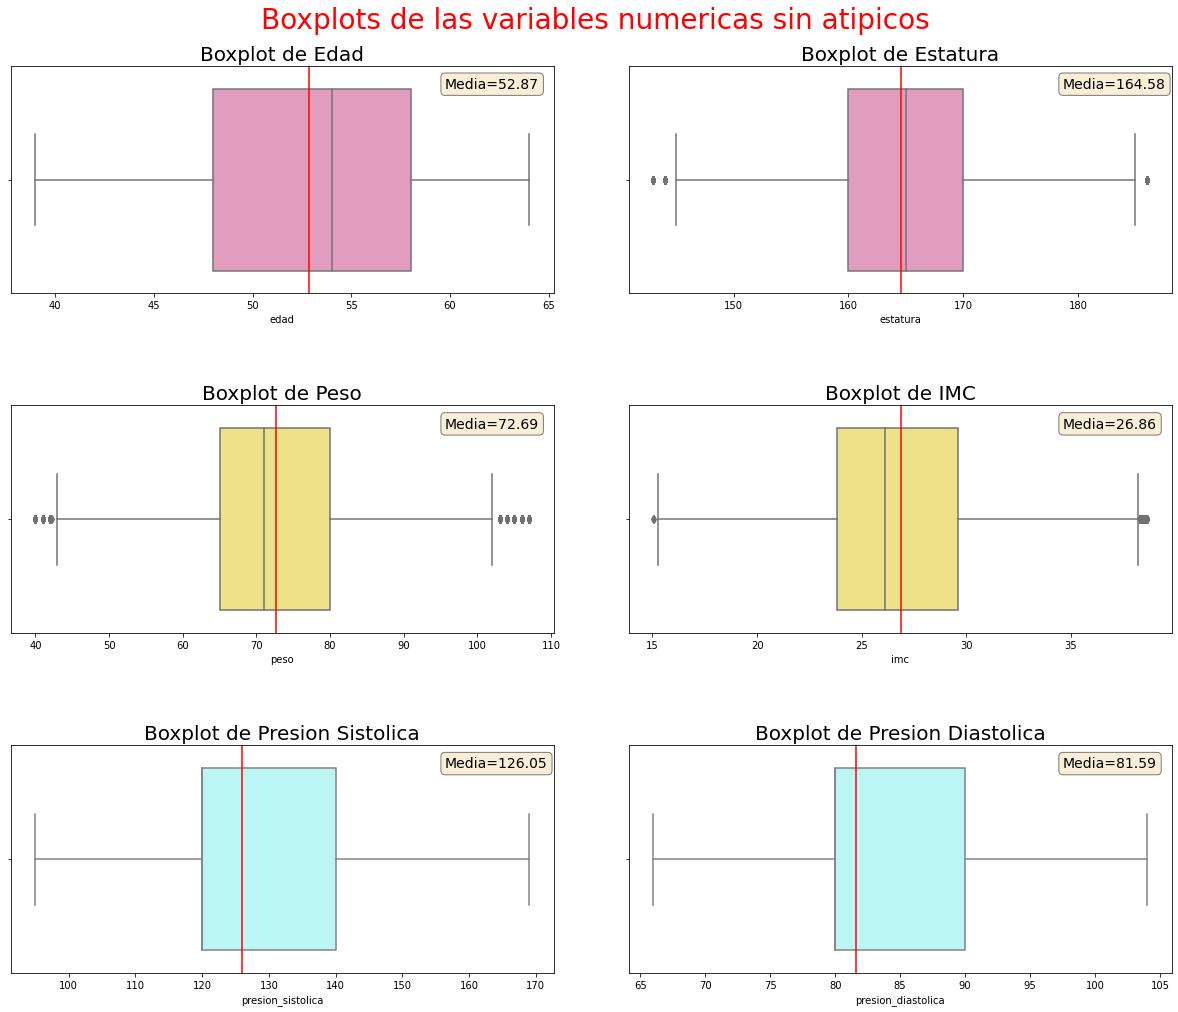

In [ ]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)

fig.suptitle('Boxplots de las variables numericas sin atipicos', fontsize=28, color= 'r');

Nombres = ['Edad', 'Estatura', 'Peso', 'IMC', 'Presion Sistolica', 'Presion Diastolica']
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

i=0
for axe in axes.flat:
# Si se requiere un subplot impar
#  if i == 7:                     
#    axes[3,1].set_axis_off();
#    break;
  media=df_final[variables_numericas[i]].mean()
  textstr = '\n'.join({r'Media=%.2f' % (media, )})
  sns.boxplot(x = df_final[variables_numericas[i]], ax = axe, color = palette[i]);
  axe.axvline(df_final[variables_numericas[i]].mean(), c='r')
  axe.set_title(f'Boxplot de {Nombres[i]}', fontsize=20);
  axe.text(.8, 0.95, textstr, transform=axe.transAxes, fontsize=14, verticalalignment='top', bbox=props)
  i +=1

fig.tight_layout(pad=6)

In [ ]:
df_final.describe().T

count        mean  ...     75%     max
edad                       60646.0   52.872819  ...   58.00   64.00
genero                     60646.0    1.354731  ...    2.00    2.00
estatura                   60646.0  164.581209  ...  170.00  186.00
peso                       60646.0   72.693673  ...   80.00  107.00
imc                        60646.0   26.858322  ...   29.59   38.63
presion_sistolica          60646.0  126.046120  ...  140.00  169.00
presion_diastolica         60646.0   81.585892  ...   90.00  104.00
colesterol                 60646.0    1.350477  ...    1.00    3.00
glucosa                    60646.0    1.217574  ...    1.00    3.00
tabaco                     60646.0    0.087541  ...    0.00    1.00
alcohol                    60646.0    0.052188  ...    0.00    1.00
act_fisica                 60646.0    0.804670  ...    1.00    1.00
enfermedad_cardiovascular  60646.0    0.488276  ...    1.00    1.00

[13 rows x 8 columns]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60646 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       60646 non-null  int64  
 1   genero                     60646 non-null  int64  
 2   estatura                   60646 non-null  int64  
 3   peso                       60646 non-null  float64
 4   imc                        60646 non-null  float64
 5   presion_sistolica          60646 non-null  int64  
 6   presion_diastolica         60646 non-null  int64  
 7   colesterol                 60646 non-null  int64  
 8   glucosa                    60646 non-null  int64  
 9   tabaco                     60646 non-null  int64  
 10  alcohol                    60646 non-null  int64  
 11  act_fisica                 60646 non-null  int64  
 12  enfermedad_cardiovascular  60646 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.5 MB


* Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

In [ ]:
for columna in variables_numericas:
    segmentos = pd.cut(df_final[columna], 10)
    print(f'Tabla de frecuencias de:')
    #print(f'{df_final[columna].groupby(segmentos).count()}\n\n')
    pp.pprint(df_final[columna].groupby(segmentos).count())
    print('\n\n')

Tabla de frecuencias de:
edad
(38.975, 41.5]    4508
(41.5, 44.0]      4271
(44.0, 46.5]      3195
(46.5, 49.0]      6430
(49.0, 51.5]      5718
(51.5, 54.0]      9377
(54.0, 56.5]      6550
(56.5, 59.0]      9287
(59.0, 61.5]      5135
(61.5, 64.0]      6175
Name: edad, dtype: int64



Tabla de frecuencias de:
estatura
(142.957, 147.3]      497
(147.3, 151.6]       1860
(151.6, 155.9]       4326
(155.9, 160.2]      12831
(160.2, 164.5]       9496
(164.5, 168.8]      13405
(168.8, 173.1]      10721
(173.1, 177.4]       4378
(177.4, 181.7]       2352
(181.7, 186.0]        780
Name: estatura, dtype: int64



Tabla de frecuencias de:
peso
(39.933, 46.7]      340
(46.7, 53.4]       1833
(53.4, 60.1]       7201
(60.1, 66.8]      10351
(66.8, 73.5]      14423
(73.5, 80.2]      12102
(80.2, 86.9]       6270
(86.9, 93.6]       4734
(93.6, 100.3]      2530
(100.3, 107.0]      862
Name: peso, dtype: int64



Tabla de frecuencias de:
imc
(15.016, 17.399]      160
(17.399, 19.758]     1092
(19.758

In [ ]:
curtosis = []
asimetria = []

for columna in variables_numericas:
  curtosis.append(kurtosis(df_final[columna]))
  asimetria.append(skew(df_final[columna]))

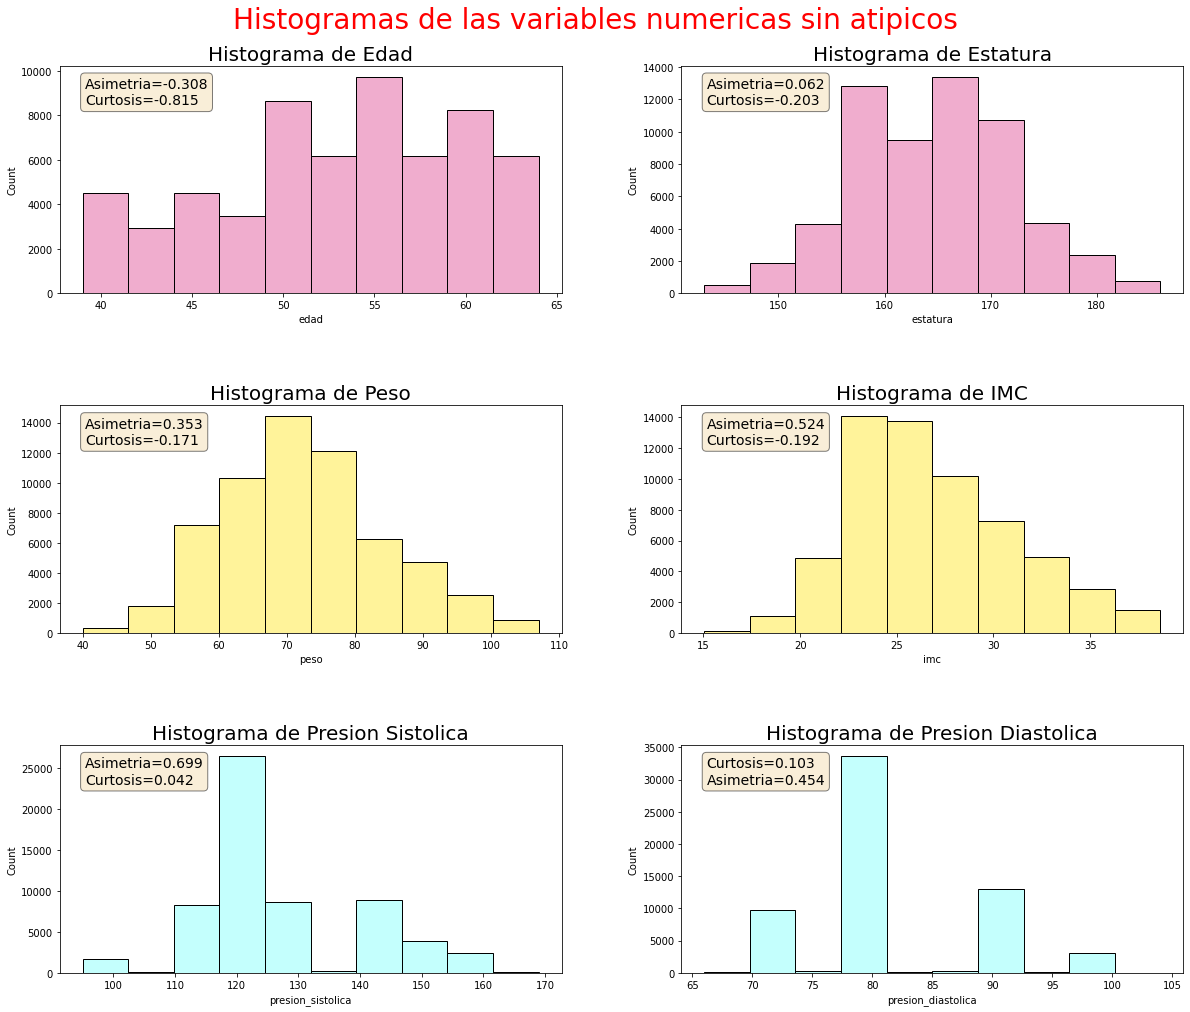

In [ ]:
fig = plt.figure(figsize = (18, 15))
axes = fig.subplots(3, 2, sharex = False, sharey = False)
fig.suptitle('Histogramas de las variables numericas sin atipicos', fontsize=28, color= 'r');

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
 
b = 10
i=0
for axe in axes.flat:
  textstr = '\n'.join({r'Curtosis=%.3f' % (curtosis[i], ), r'Asimetria=%.3f' % (asimetria[i], )})

  sns.histplot(df_final[variables_numericas[i]], ax = axe, color = palette[i], bins = b);
  axe.set_title(f'Histograma de {Nombres[i]}', fontsize=20);
  axe.text(.05, 0.95, textstr, transform=axe.transAxes, fontsize=14, verticalalignment='top', bbox=props)

  i +=1

fig.tight_layout(pad=6)

In [ ]:
for columna in variables_numericas:
    print(f'Variable: "{columna}"')
    print(f'  - Curtosis: {kurtosis(df_final[columna])}')
    print(f'  - Asimetría: {skew(df_final[columna])}\n')

Variable: "edad"
  - Curtosis: -0.8146140960101342
  - Asimetría: -0.3080328194907456

Variable: "estatura"
  - Curtosis: -0.20330168866493326
  - Asimetría: 0.061574325519162074

Variable: "peso"
  - Curtosis: -0.1712200061859015
  - Asimetría: 0.3530246120129392

Variable: "imc"
  - Curtosis: -0.19248793142271703
  - Asimetría: 0.5237602333493007

Variable: "presion_sistolica"
  - Curtosis: 0.04182751309558208
  - Asimetría: 0.6988873669829082

Variable: "presion_diastolica"
  - Curtosis: 0.10324957761354359
  - Asimetría: 0.4543878916359017



* Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

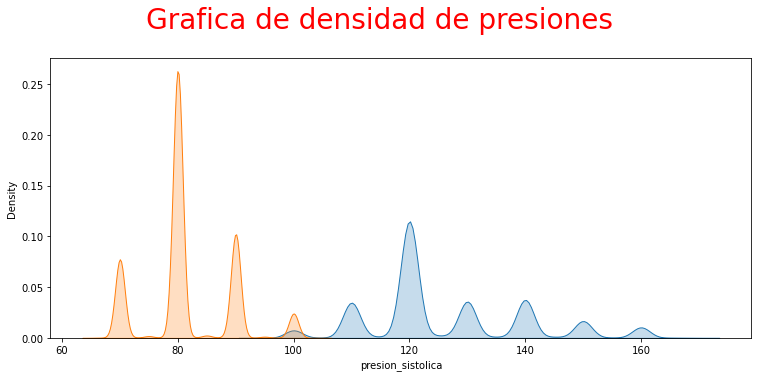

In [ ]:
fig = plt.figure(figsize = (12, 6))
fig.suptitle('Grafica de densidad de presiones', fontsize=28, color= 'r');

sns.kdeplot(df_final['presion_sistolica'], fill = True, label= 'presion');
sns.kdeplot(df_final['presion_diastolica'], fill = True);

fig.tight_layout(pad=6)
# Explicación de las presiones altas y bajas

## Postwork 3 - Exploración de Variables Categóricas y Análisis Multivariable





* Nuestras variables categóricas son las siguientes:
    * Género.
    * Colesterol.
    * Glucosa.
    * Tabaco.
    * Alcohol.
    * Actividad física.
    * Enfermedad cardiovascular.


In [ ]:
var_categoricas = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica', 'enfermedad_cardiovascular'] # Variables categóricas
conteos = []

for columna in var_categoricas:
    conteos.append(df_final[columna].value_counts())

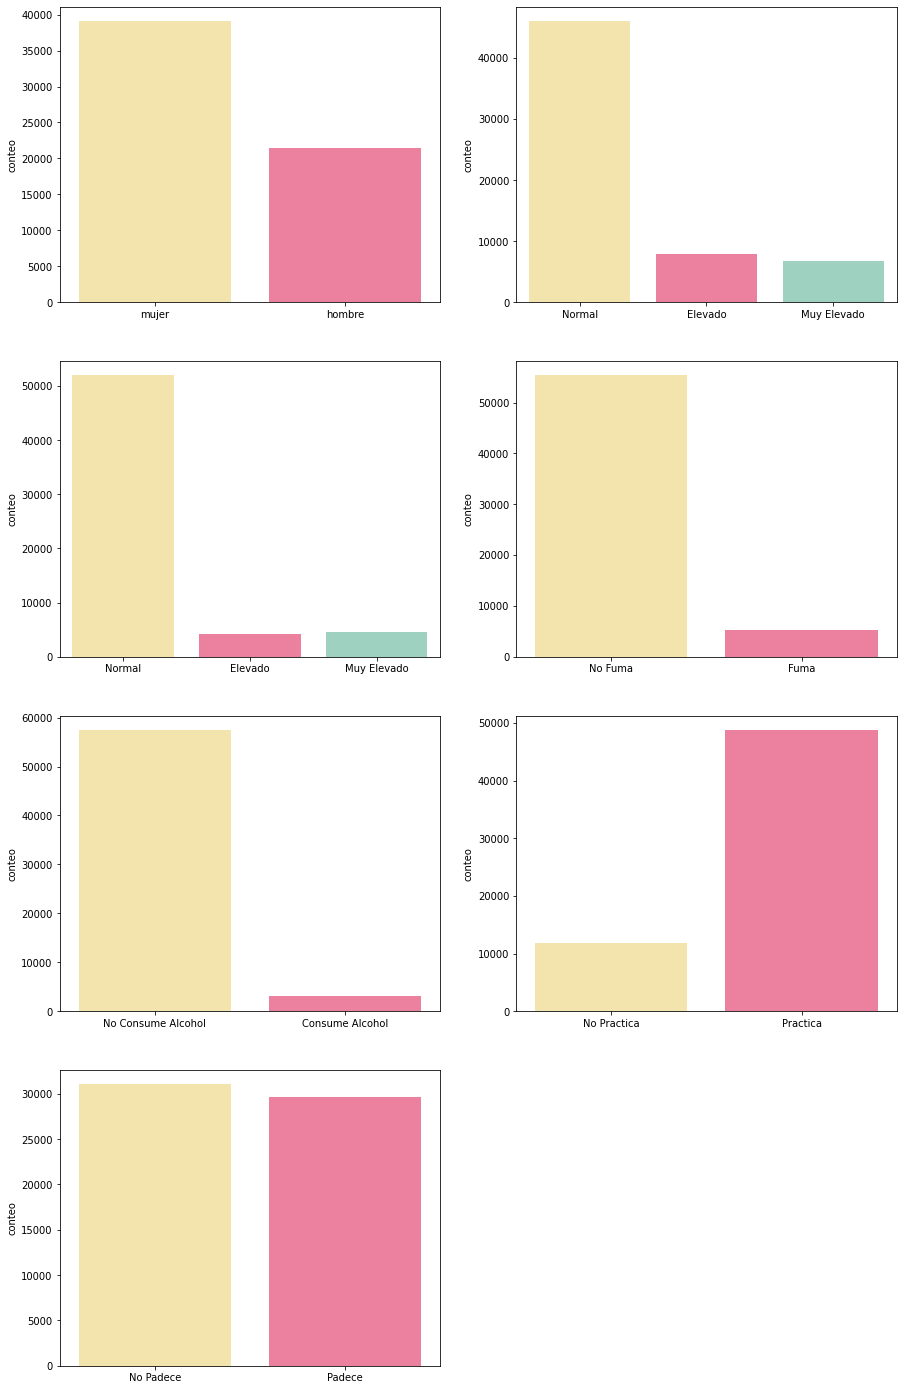

In [ ]:
fig_2 = plt.figure(figsize = (15, 25))
axes = fig_2.subplots(4, 2, sharex = False, sharey = False)

dos_col = ['#FFEBA1', '#FD6F96']
tres_col = ['#FFEBA1', '#FD6F96', '#95DAC1']

g = sns.barplot(x = conteos[0].index, y = conteos[0], ax = axes[0, 0], palette = dos_col);
g.set(ylabel = 'conteo')
g.set_xticklabels(labels = ['mujer', 'hombre'])

c = sns.barplot(x = conteos[1].index, y = conteos[1], ax = axes[0, 1], palette = tres_col);
c.set(ylabel = 'conteo')
c.set_xticklabels(labels = ['Normal', 'Elevado', 'Muy Elevado'])

gl = sns.barplot(x = conteos[2].index, y = conteos[2], ax = axes[1, 0], palette = tres_col);
gl.set(ylabel = 'conteo')
gl.set_xticklabels(labels = ['Normal', 'Elevado', 'Muy Elevado'])

t = sns.barplot(x = conteos[3].index, y = conteos[3], ax = axes[1, 1], palette = dos_col);
t.set(ylabel = 'conteo')
t.set_xticklabels(labels = ['No Fuma', 'Fuma'])

a = sns.barplot(x = conteos[4].index, y = conteos[4], ax = axes[2, 0], palette = dos_col);
a.set(ylabel = 'conteo')
a.set_xticklabels(labels = ['No Consume Alcohol', 'Consume Alcohol'])

af = sns.barplot(x = conteos[5].index, y = conteos[5], ax = axes[2, 1], palette = dos_col);
af.set(ylabel = 'conteo')
af.set_xticklabels(labels = ['No Practica', 'Practica'])

ec = sns.barplot(x = conteos[6].index, y = conteos[6], ax = axes[3, 0], palette = dos_col);
ec.set(ylabel = 'conteo')
ec.set_xticklabels(labels = ['No Padece', 'Padece'])

axes[3, 1].set_axis_off()

Consideramos que las siguientes relaciones entre variables son útiles para nuestro análisis.

* genero - enfermedad cardiovascular
* colesterol - enfermedad cardiovascular
* glucosa - enfermedad cardiovascular
* tabaco - enfermedad cardiovascular
* alcohol - enfermedad cardiovascular
* actividad física - enfermedad cardiovascular

In [ ]:
def porcentajes (abs_values):
  rel_values = abs_values / abs_values.sum(axis = 1, keepdims = True) * 100
  labels = zip(abs_values.T.flatten(), rel_values.T.flatten())
  for path in ax.patches:
    abs_value, rel_value = next(labels)
    label = f"{rel_value:.2f}% ({abs_value})"
    width, height = path.get_width(), path.get_height()
    x, y = path.get_xy() 
    ax.text(x = x + width / 2, y = y + height / 2, s = label, horizontalalignment = 'center', verticalalignment = 'center')

In [ ]:
def personalizar_crosstab(ax, titulo, ylabel, xlabel, bgrid):
  ax.set_title(titulo, fontsize = 25);
  ax.set_ylabel(ylabel, fontsize = 20);
  ax.set_xlabel(xlabel, fontsize = 20)
  ax.grid(bgrid)
  abs_values = df_generado.values
  porcentajes(abs_values);

enfermedad_cardiovascular      0      1  total
genero                                        
1                          20010  19123  39133
2                          11024  10489  21513
total                      31034  29612  60646 




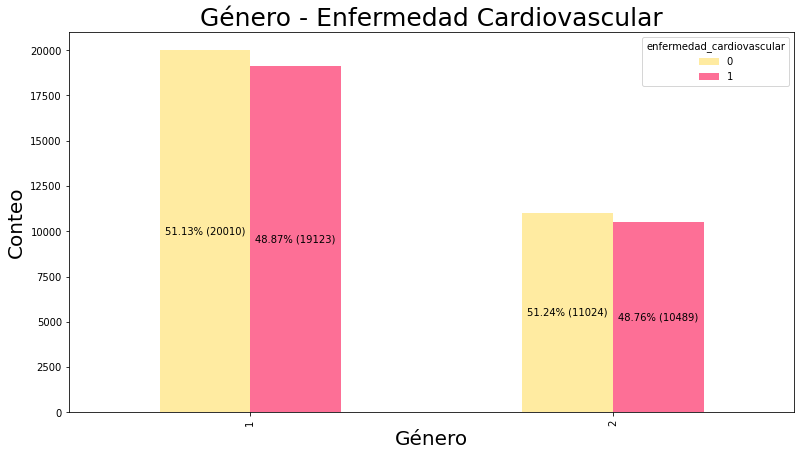

In [ ]:
print(pd.crosstab(df_final['genero'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['genero'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7), color = dos_col);
personalizar_crosstab(ax, 'Género - Enfermedad Cardiovascular', 'Conteo', 'Género', bgrid = False);

* El 51.13% de las mujeres estudiadas no tienen una enfermedad cardiovascular.
* El 51.24% de los hombres estudiados no tienen una enfermedad cardiovascular.

enfermedad_cardiovascular      0      1  total
colesterol                                    
1                          26175  19911  46086
2                           3234   4631   7865
3                           1625   5070   6695
total                      31034  29612  60646 




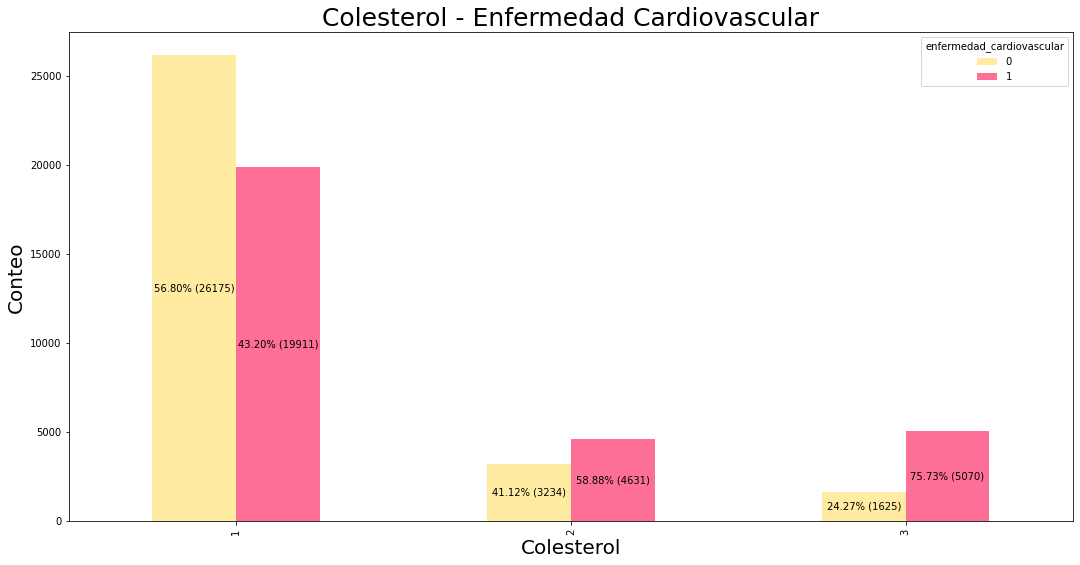

In [ ]:
print(pd.crosstab(df_final['colesterol'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['colesterol'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (18, 9), color = dos_col);
personalizar_crosstab(ax, 'Colesterol - Enfermedad Cardiovascular', 'Conteo', 'Colesterol', bgrid = False);

* El 58.8% de las personas con un nivel de colesterol normal no tienen una enfermedad cardiovascular.
* El 75.73% de las personas con un nivel de colesterol muy elevado tienen una enfermedad cardiovascular.

enfermedad_cardiovascular      0      1  total
glucosa                                       
1                          27499  24469  51968
2                           1777   2384   4161
3                           1758   2759   4517
total                      31034  29612  60646 




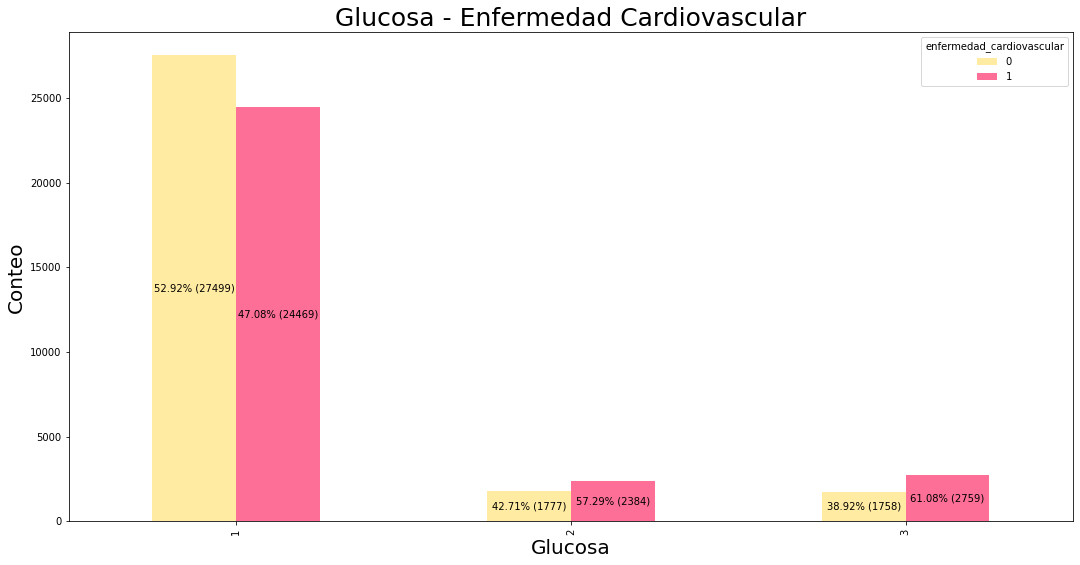

In [ ]:
print(pd.crosstab(df_final['glucosa'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['glucosa'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (18, 9), color = dos_col);
personalizar_crosstab(ax, 'Glucosa - Enfermedad Cardiovascular', 'Conteo', 'Glucosa', bgrid = False);

* El 52.92% de las personas con un nivel de glucosa normal no tienen una enfermedad cardiovascular.
* El 61.08% de las personas con un nivel de glucosa muy alta tienen una enfermedad cardiovascular.

enfermedad_cardiovascular      0      1  total
tabaco                                        
0                          28137  27200  55337
1                           2897   2412   5309
total                      31034  29612  60646 




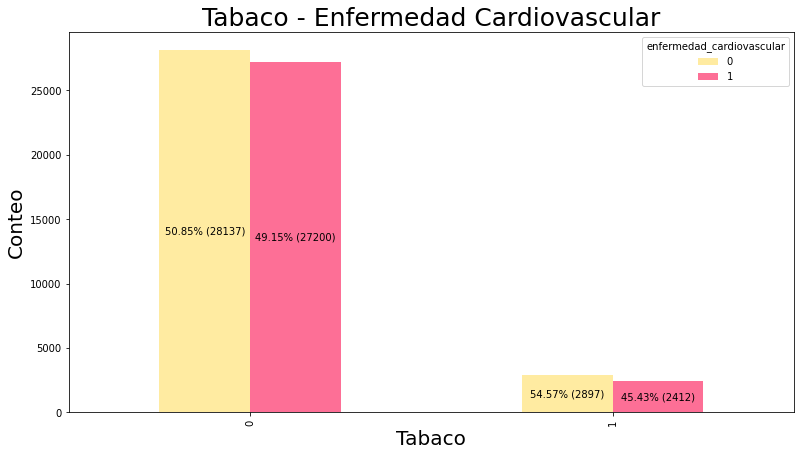

In [ ]:
print(pd.crosstab(df_final['tabaco'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['tabaco'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7), color = dos_col);
personalizar_crosstab(ax, 'Tabaco - Enfermedad Cardiovascular', 'Conteo', 'Tabaco', bgrid = False);

* El 50.85% de las personas que no consumen tabaco, no tienen una enfermedad cardiovascular.
* El 54.57% de las personas que sí consumen tabaco, no tienen una enfermedad cardiovascular.

enfermedad_cardiovascular      0      1  total
alcohol                                       
0                          29326  28155  57481
1                           1708   1457   3165
total                      31034  29612  60646 




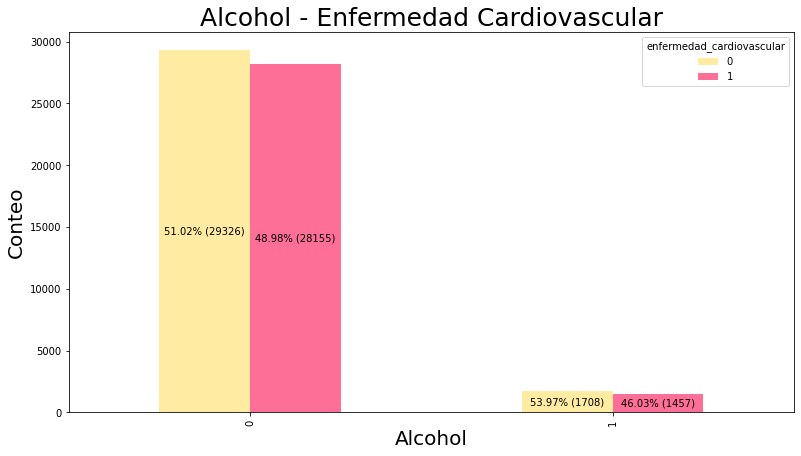

In [ ]:
print(pd.crosstab(df_final['alcohol'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['alcohol'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7), color = dos_col);
personalizar_crosstab(ax, 'Alcohol - Enfermedad Cardiovascular', 'Conteo', 'Alcohol', bgrid = False);

enfermedad_cardiovascular      0      1  total
act_fisica                                    
0                           5618   6228  11846
1                          25416  23384  48800
total                      31034  29612  60646 




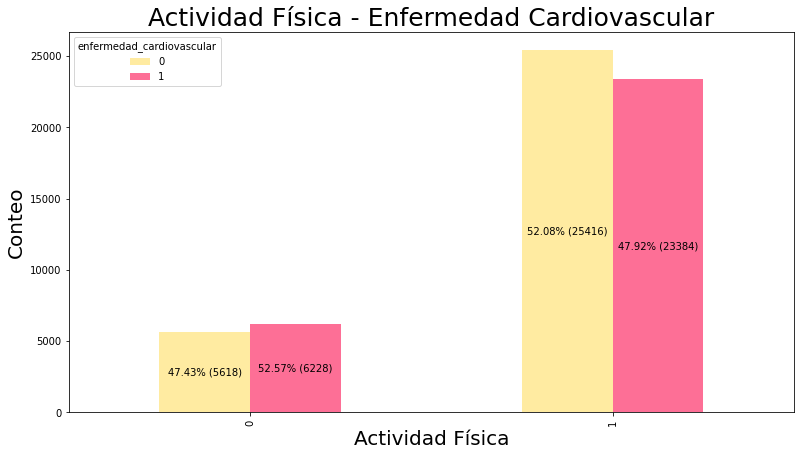

In [ ]:
print(pd.crosstab(df_final['act_fisica'], df_final['enfermedad_cardiovascular'], margins = True, margins_name = 'total'), '\n\n')

df_generado = pd.crosstab(df_final['act_fisica'], df_final['enfermedad_cardiovascular']);
ax = df_generado.plot.bar(stacked = False, figsize = (13, 7), color = dos_col);
personalizar_crosstab(ax, 'Actividad Física - Enfermedad Cardiovascular', 'Conteo', 'Actividad Física', bgrid = False);

Boxplot y violinplot de las siguientes relaciones entre variables.

* edad - enfermedad cardiovascular
* imc - glucosa
* imc - colesterol
* imc - enfermedad cardiovascular
* presion diastolica - enfermedad cardiovascular

In [ ]:
def boxvio(data, x, y):
    fig = plt.figure(figsize = (15, 6))
    axes = fig.subplots(1, 2, sharex = False, sharey = False)
    if len(data[x].unique()) == 2:
        color = ['#FFEBA1', '#FD6F96']
    else:
        color = ['#FFEBA1', '#FD6F96', '#95DAC1']
    sns.boxplot(data = data, x = x, y = y, ax = axes[0], palette = color);
    sns.violinplot(data = data, x = x, y = y, ax = axes[1], palette = color);
    axes[0].set_title(f'Boxplot de {x} - {y}')
    axes[1].set_title(f'Violinplot de {x} - {y}')

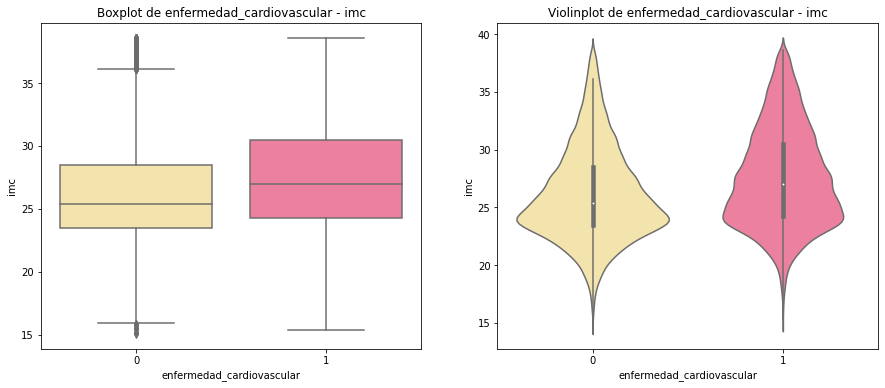

In [ ]:
boxvio(df_final, 'enfermedad_cardiovascular', 'imc')

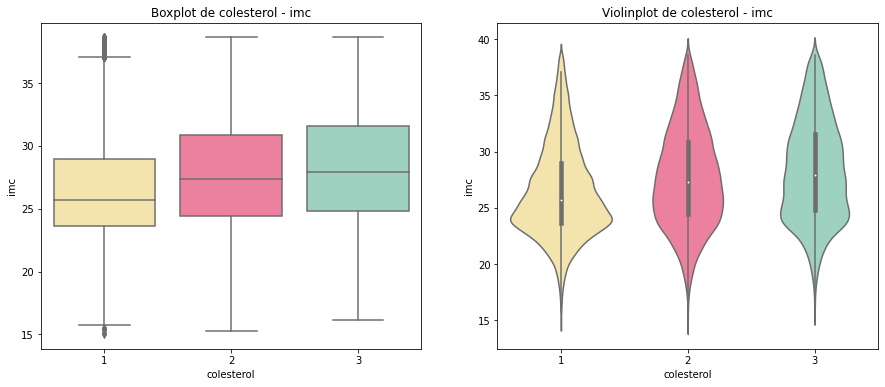

In [ ]:
boxvio(df_final, 'colesterol', 'imc')

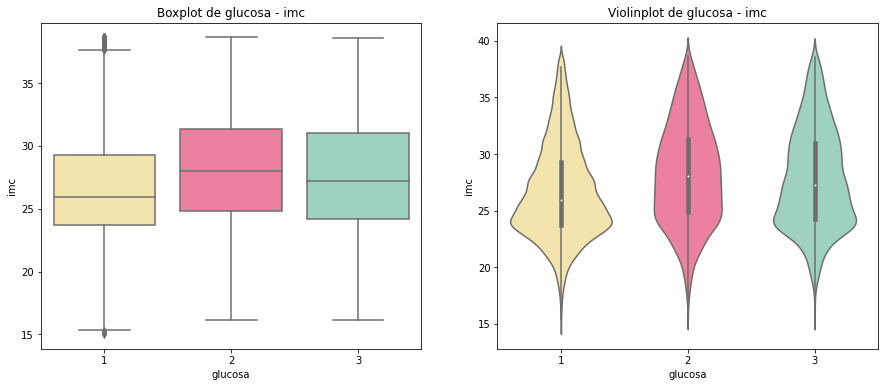

In [ ]:
boxvio(df_final, 'glucosa', 'imc')

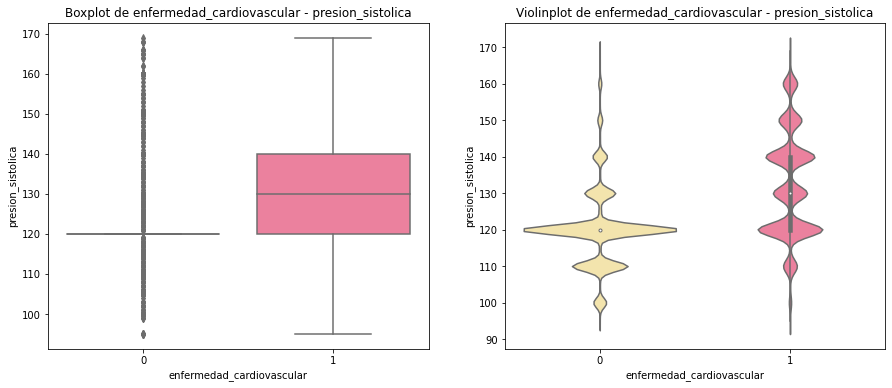

In [ ]:
boxvio(df_final, 'enfermedad_cardiovascular', 'presion_sistolica')

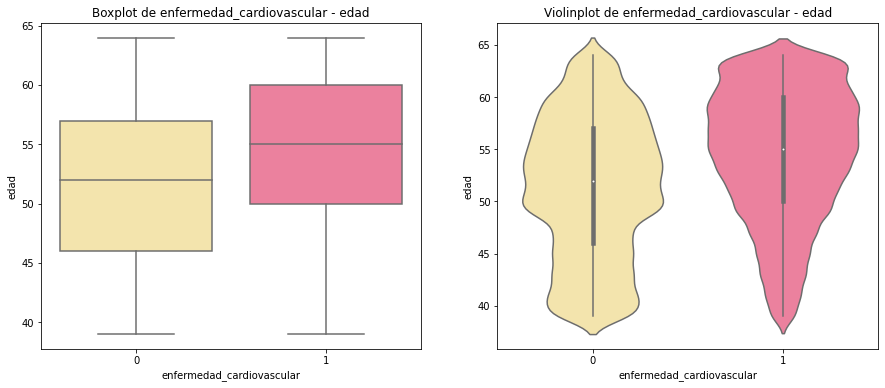

In [ ]:
boxvio(df_final, 'enfermedad_cardiovascular', 'edad')

## Postwork 4 - Correlaciones y Regresión Linear Simple



In [ ]:
df_num = df.drop(columns = ['genero', 'colesterol', 'alcohol', 'glucosa', 'tabaco', 'act_fisica', 'enfermedad_cardiovascular'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       70000 non-null  int64  
 1   genero                     70000 non-null  int64  
 2   estatura                   70000 non-null  int64  
 3   peso                       70000 non-null  float64
 4   imc                        70000 non-null  float64
 5   presion_sistolica          70000 non-null  int64  
 6   presion_diastolica         70000 non-null  int64  
 7   colesterol                 70000 non-null  int64  
 8   glucosa                    70000 non-null  int64  
 9   tabaco                     70000 non-null  int64  
 10  alcohol                    70000 non-null  int64  
 11  act_fisica                 70000 non-null  int64  
 12  enfermedad_cardiovascular  70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 7.5 MB


### Matriz de correlaciones de los valores completos.

Nos interesa calcular la **correlación** de nuestras variables numéricas, es decir, que tanta relación existen entre estas, si es posible ver que alguna variable aumente cuando otra también aumente o disminuya. Esto nos permitirá conocer mejor nuestros datos y también hacer predicciones definiendo una variable dependiente y una o más variables independientes. Para eso usaremos la funcion corr(). 

Nota: Primero usaremos los valores completos de nuestro dataframe, más abajo se encuentran las graficas con nuestros datos ya filtrados.

In [ ]:
df_num.corr()

edad  estatura  ...  presion_sistolica  presion_diastolica
edad                1.000000 -0.081506  ...           0.020854            0.017620
estatura           -0.081506  1.000000  ...           0.005488            0.006150
peso                0.053561  0.290968  ...           0.030702            0.043710
imc                 0.085403 -0.290642  ...           0.024851            0.035344
presion_sistolica   0.020854  0.005488  ...           1.000000            0.016086
presion_diastolica  0.017620  0.006150  ...           0.016086            1.000000

[6 rows x 6 columns]

### Heatmap de los valores completos 

Una forma de mostrar la tabla de arriba de una forma más visual y entendible es usar un mapa de calor o **heatmap**.

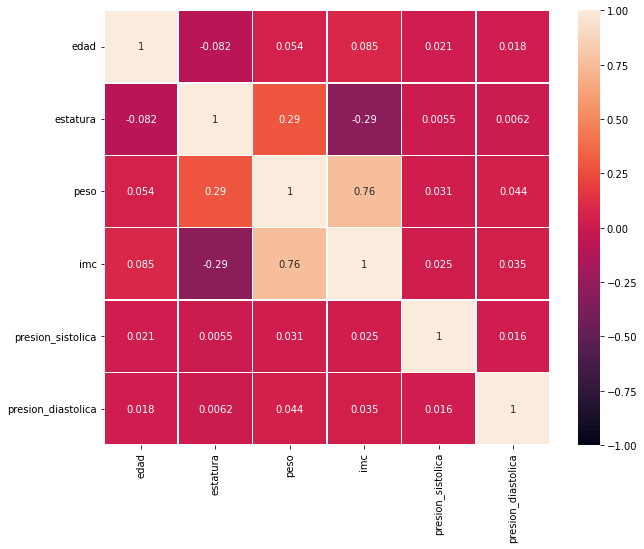

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_num.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5)

### Pairplot (relaciones entre variables numéricas) de los valores completos.

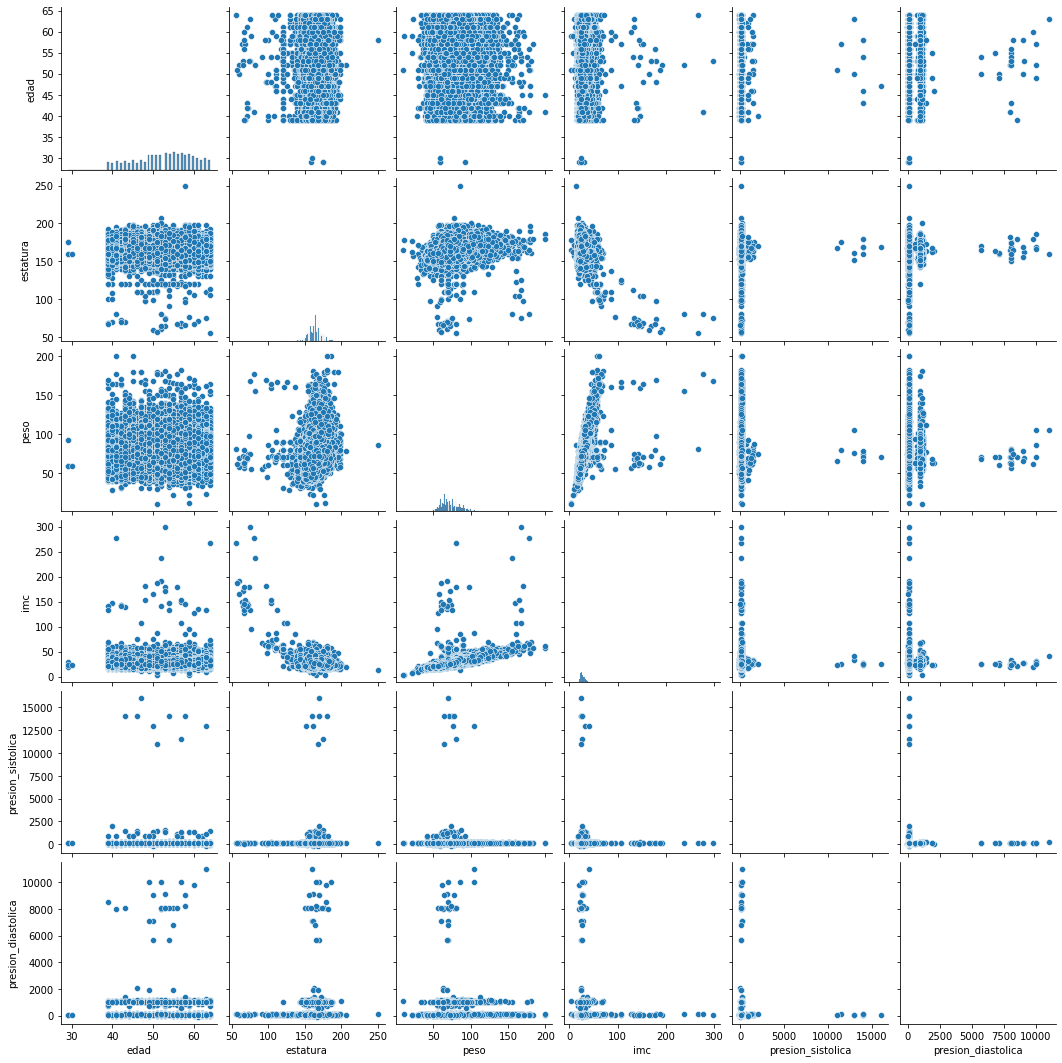

In [ ]:
sns.pairplot(df_num);

# Explicar sobre las presiones.

En este pairplot claramente tenemos una **irregularidad** muy notable con las presiones, en la presión sistólica llega a tener un valor hasta de 16000 mm Hg y en la presión diastólica de 11000 mm Hg, lo cual es imposible para cualquier ser humano.

Este es un claro ejemplo de porque es necesario limpiar los datos!



### Dataframe final

Quitamos los valores atípicos y tenemos como resultado el siguiente Dataframe.
Este DataFrame es el que le aplicamos el filtro de IQR.

In [ ]:
df_final.head()

edad  genero  estatura  ...  alcohol  act_fisica  enfermedad_cardiovascular
0    50       2       168  ...        0           1                          0
1    55       1       156  ...        0           1                          1
2    51       1       165  ...        0           0                          1
3    48       2       169  ...        0           1                          1
5    60       1       151  ...        0           0                          0

[5 rows x 13 columns]

In [ ]:
df_final_num = df_final.drop(columns = ['genero', 'colesterol', 'alcohol', 'glucosa', 'tabaco', 'act_fisica', 'enfermedad_cardiovascular'])

### Matriz de correlaciones sin los valores atípicos.

Veamos la correlación de nuestras variables ya con los datos filtrados.

In [ ]:
df_final_num.corr()

edad  estatura  ...  presion_sistolica  presion_diastolica
edad                1.000000 -0.091505  ...           0.201349            0.143918
estatura           -0.091505  1.000000  ...          -0.001605            0.015340
peso                0.049047  0.368141  ...           0.220683            0.203390
imc                 0.106569 -0.201687  ...           0.232543            0.204137
presion_sistolica   0.201349 -0.001605  ...           1.000000            0.702934
presion_diastolica  0.143918  0.015340  ...           0.702934            1.000000

[6 rows x 6 columns]

### Heatmap sin los valores atípicos.

Y hacemos el Heatmap correspondiente 

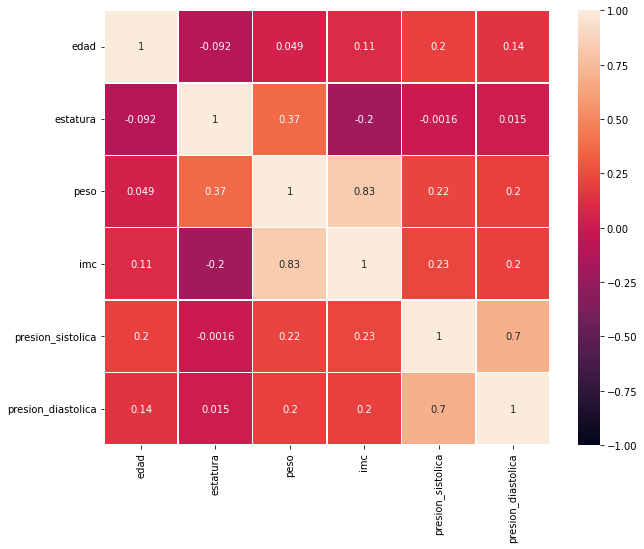

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_final_num.corr(), vmin = -1, vmax = 1, annot = True, linewidths = 0.5);

### Pairplot sin los valores atípicos.

Generamos el pairplot con los datos ya filtrados.

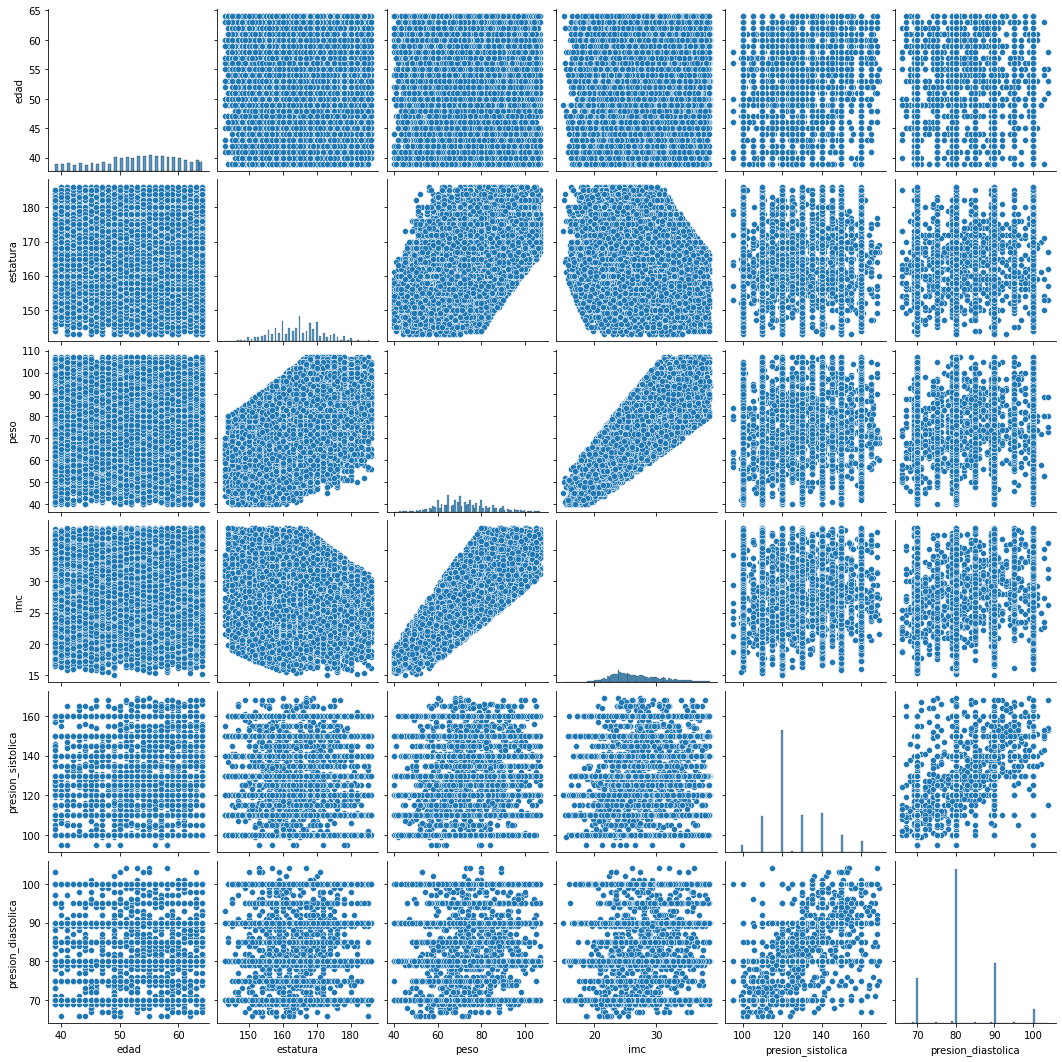

In [ ]:
sns.pairplot(df_final_num);

Este pairplot muestra un mejor comportamiento que el anterior dado que ya no tenemos el problema de los valores atipicos.

Para las siguientes variables entrenaremos un modelo de regresión lineal:

* peso (i) - imc (d)
* estatura (i) - peso (d)
* imc (i) - presion_sistolica (d)

La ecuación de la recta es: y = 0.5827163327298882 x + -23.210485745356635
R^2: 0.13552804955713948 




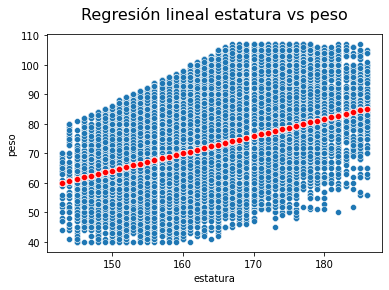

In [ ]:
lr = LinearRegression()
lr.fit(X = df_final['estatura'].to_frame(), y = df_final['peso'])

y_predict = lr.predict(df_final['estatura'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'La ecuación de la recta es: y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['estatura'].to_frame(), y = df_final['peso']), '\n\n')
#plt.figure(figsize=(9,7))
ax=sns.scatterplot(x = df_final['estatura'], y = df_final['peso']);
sns.scatterplot(x = df_final['estatura'], y = y_predict, color="r");
ax.set_title('Regresión lineal estatura vs peso', fontsize=16, pad=15);

La ecuación de la recta es: y = 0.756049647904232 x + 105.73989541506636
R^2: 0.054076304387463796 




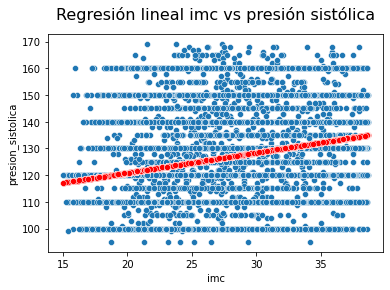

In [ ]:
lr = LinearRegression()
lr.fit(X = df_final['imc'].to_frame(), y = df_final['presion_sistolica'])

y_predict = lr.predict(df_final['imc'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'La ecuación de la recta es: y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['imc'].to_frame(), y = df_final['presion_sistolica']), '\n\n')

ax=sns.scatterplot(x = df_final['imc'], y = df_final['presion_sistolica']);
sns.scatterplot(x = df_final['imc'], y = y_predict, color = "r");
ax.set_title('Regresión lineal imc vs presión sistólica', fontsize=16, pad=15);

La ecuación de la recta es: y = 0.2955341421612878 x + 5.374859507538854
R^2: 0.6934485347402611 




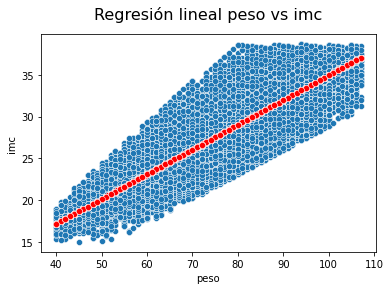

In [ ]:
lr = LinearRegression()
lr.fit(X = df_final['peso'].to_frame(), y = df_final['imc'])

y_predict = lr.predict(df_final['peso'].to_frame())

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'La ecuación de la recta es: y = {coefficient} x + {intercept}')
print('R^2:', lr.score(X = df_final['peso'].to_frame(), y = df_final['imc']), '\n\n')

ax=sns.scatterplot(x = df_final['peso'], y =df_final['imc']);
sns.scatterplot(x = df_final['peso'], y = y_predict, color = "r");
ax.set_title('Regresión lineal peso vs imc', fontsize=16, pad=15);

Como era de esperar, el indice de masa corporal IMC es linealmente dependiente del peso, esto tiene sentido dado como se calcula el IMC. $$\text{IMC} = \frac{peso}{(estatura)^2}$$

## Postwork 5 - Distribuciones muestrales y técnicas de evaluación de modelos



#### Identficar las variables numéricas y revisar las medidas de locación y dispersión.
##### Variables numéricas:
- edad
- estatura
- peso
- imc
- presion_sistolica
- presion_asistolica

In [ ]:
estimados_loc

promedio  mediana  ...     75%  rango_intercuartil
edad                 52.872819    54.00  ...   58.00               10.00
estatura            164.581209   165.00  ...  170.00               10.00
peso                 72.693673    71.00  ...   80.00               15.00
imc                  26.858322    26.12  ...   29.59                5.76
presion_sistolica   126.046120   120.00  ...  140.00               20.00
presion_diastolica   81.585892    80.00  ...   90.00               10.00

[6 rows x 9 columns]

#### Utilizando la ténica de bootstrap, exploramos las distribuciones muestrales de las estadísitcas obtenidas anteriormente.

In [ ]:
def bootstrap(data):
    medias = []
    for i in range(100_000):
        muestra = data.sample(n = 1000, replace = True)
        medias.append(muestra.mean())                   
    return pd.Series(medias)

###### - Definimos una función de impresión, para los cálculos de Rango, Asimetría, Curtosis, Mínimo, Máximo, Error Estándar, Intervalo de Confianza de la Media de cada bootstrap obtenido.
###### - Dentro de la función tambien hemos puesto titulo, xlabel, ylabel, axvline para nuestro gráfico histplot.

In [ ]:
def impresion(lista, columna, xtitle, ytitle):
    lim_inf = lista.quantile(0.025)
    lim_sup = lista.quantile(0.975)

    print(f'Mínimo: {lista.min()}')
    print(f'Máximo: {lista.max()}')
    print(f'Rango: {lista.max() - lista.min()}')
    print(f'Asimetría: {lista.skew()}')
    print(f'Curtosis: {lista.kurtosis()}')
    print(f'Error estándar: {lista.std()}')
    print(f'Intervalo de 95% confianza de la media: {lim_inf} < {columna.mean()} < {lim_sup}\n')

    histplot = sns.histplot(data = lista, color = '#FF3F00')
    histplot.set_title(f'Bootstrap de {xtitle}')
    histplot.set_ylabel(ytitle)
    histplot.set_xlabel(xtitle)
    plt.axvline(lim_inf, c = '#FAFF00')
    plt.axvline(lim_sup, c = '#FAFF00')

Mínimo: 51.927
Máximo: 53.819
Rango: 1.892000000000003
Asimetría: -0.0073419048163368035
Curtosis: 0.007318025040605303
Error estándar: 0.21293056060606222
Intervalo de 95% confianza de la media: 52.455 < 52.87281931207335 < 53.291



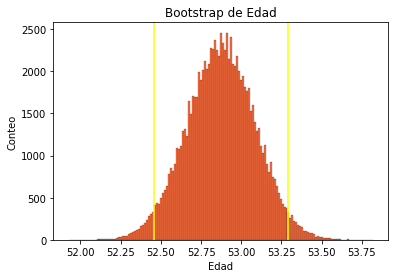

In [ ]:
impresion(bootstrap(df_final['edad']), df_final['edad'], "Edad", "Conteo")

Mínimo: 163.146
Máximo: 165.658
Rango: 2.5120000000000005
Asimetría: -0.018597153400366384
Curtosis: 0.04318817576262157
Error estándar: 0.2360883514975828
Intervalo de 95% confianza de la media: 164.115 < 164.58120898328002 < 165.044



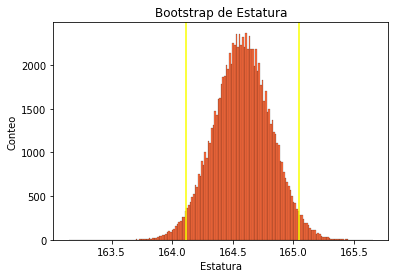

In [ ]:
impresion(bootstrap(df_final['estatura']), df_final['estatura'], "Estatura", "Conteo")

Mínimo: 71.17644
Máximo: 74.4742
Rango: 3.2977599999999967
Asimetría: 0.0219843610578667
Curtosis: 0.02917691660041566
Error estándar: 0.37479244433415804
Intervalo de 95% confianza de la media: 71.96076824999999 < 72.69367278963163 < 73.42860250000001



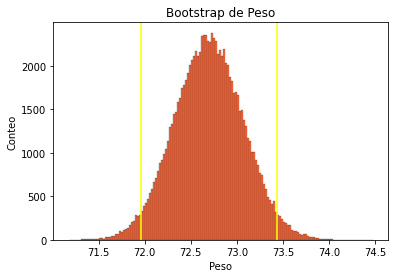

In [ ]:
impresion(bootstrap(df_final['peso']), df_final['peso'], "Peso", "Conteo")

Mínimo: 26.30000999999997
Máximo: 27.424269999999982
Rango: 1.1242600000000138
Asimetría: 0.018181734804947287
Curtosis: 0.04070973503207087
Error estándar: 0.13258433270341205
Intervalo de 95% confianza de la media: 26.599140000000002 < 26.85832173597509 < 27.11993024999996



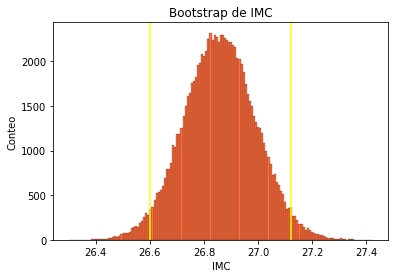

In [ ]:
impresion(bootstrap(df_final['imc']), df_final['imc'], "IMC", "Conteo")

Mínimo: 80.638
Máximo: 82.895
Rango: 2.256999999999991
Asimetría: 0.0019720855988952166
Curtosis: -0.017303031905436583
Error estándar: 0.23941455704551415
Intervalo de 95% confianza de la media: 81.117975 < 81.58589189723972 < 82.056



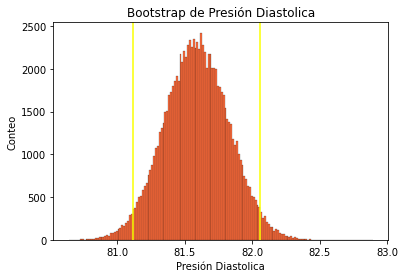

In [ ]:
impresion(bootstrap(df_final['presion_diastolica']), df_final['presion_diastolica'], "Presión Diastolica", "Conteo")

Mínimo: 124.201
Máximo: 128.242
Rango: 4.040999999999997
Asimetría: 0.028161247738644937
Curtosis: -0.0007578577426632371
Error estándar: 0.4318004200701125
Intervalo de 95% confianza de la media: 125.206 < 126.04612010684959 < 126.898



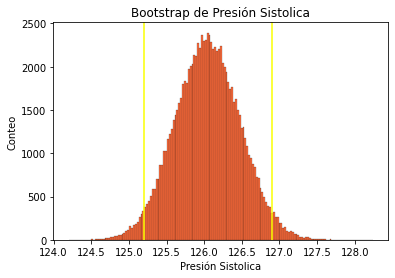

In [ ]:
impresion(bootstrap(df_final['presion_sistolica']), df_final['presion_sistolica'], "Presión Sistolica", "Conteo")

### Modelo de regresión linear múltiple. Número 1.
La regresión es una forma estadística de establece una relación entre una variable dependiente y un conjunto de variables independientes.
- El objetivo es predecir la variable dependiente (y), en función de los valores de las variables independientes (X).

Variables:
- peso (independiente)
- estatura (independiente)
- imc (dependiente)

Debido a que tenemos 2 variables independientes, aplicaremos una Regresión Lineal Múltiple

In [ ]:
X = df_final[['peso', 'estatura']]
y = df_final[['imc']]

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
cod = lr.score(X_test, y_test)
print(f"Coeficiente de Determinación: {cod}")

Coeficiente de Determinación: 0.9922926262430813


In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
cod2 = lr_2.score(X, y)
print(f"Coeficiente de Determinación: {cod2}")

Coeficiente de Determinación: 0.9922667030785207


### Validación cruzada número 1

In [ ]:
lr = LinearRegression()

scores = cross_validate(lr, X, y, scoring = 'r2')

scores

{'fit_time': array([0.01311016, 0.01000667, 0.01020503, 0.01011157, 0.01034808]),
 'score_time': array([0.00239873, 0.00254416, 0.00251079, 0.00264668, 0.0028615 ]),
 'test_score': array([0.99220214, 0.99240054, 0.99253385, 0.99228302, 0.9919006 ])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.6f} +/- {scores["test_score"].std():.6f}')

Score del modelo: 0.992264 +/- 0.000213


###### La presición de nuestro modelo es bastante buena ya que es de 0.992264. Esto quiere decir que nuestro algoritmo es bastante bueno para este conjunto de datos. Por lo que podemos predecir claramente el IMC, con nuestras variables de Peso y Estatura

### Modelo de regresión linear múltiple. Número 2.

Variables:
- peso (independiente)
- edad (independiente)
- presion_sistolica (dependiente)

In [ ]:
X = df_final[['edad', 'peso', 'presion_diastolica']]
y = df_final[['presion_sistolica']]

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
cod = lr.score(X_test, y_test)
print(f"Coeficiente de Determinación: {cod}")

Coeficiente de Determinación: 0.5151103506259773


In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)
cod2 = lr_2.score(X, y)
print(f"Coeficiente de Determinación: {cod2}")

Coeficiente de Determinación: 0.5103445906627914


### Validación cruzada número 2

In [ ]:
lr = LinearRegression()

scores = cross_validate(lr, X, y, scoring = 'r2')

scores

{'fit_time': array([0.01103592, 0.01187539, 0.01172876, 0.01153016, 0.01140237]),
 'score_time': array([0.00275421, 0.00304747, 0.0034225 , 0.0028975 , 0.00289059]),
 'test_score': array([0.49263097, 0.52172141, 0.50301031, 0.52599093, 0.50776159])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.6f} +/- {scores["test_score"].std():.6f}')

Score del modelo: 0.510223 +/- 0.012234


###### La presición de nuestro modelo no es muy buena ya que es de 0.510223 esto no quiere decir que el algoritmo sea malo, sino que no es el mejor para este conjunto de datos. Por lo que no será muy exacto predecir la presión diastolica dada la estatura y el peso.

## Postwork 6: Visualización de Datos Avanzada

En esta seccion se haran algunas visulizaciones de los datos pero con la diferencia que se tendra encuenta lo que son las variables categoricas ya antes vistas.

Con estas visualizaciones se lograr apreciar algunas circunstancias donde dependiendo la variables puede tomar relevancioa o no, en el resultado de padecer alguna enfermedad cardiaca o demostrar que se encuentra mas presente en algunos drupos que en otros.

### Treemaps

Los treemaps nos permitiran visualizar datos de forma jerarquica, pero antes de eso necesitamos cambiar los valores de las variables categoricas de `df_final` ya que tienen una representacion numerica y dificultara la visualizacion.





In [ ]:
df_final.head()

edad  genero  estatura  ...  alcohol  act_fisica  enfermedad_cardiovascular
0    50       2       168  ...        0           1                          0
1    55       1       156  ...        0           1                          1
2    51       1       165  ...        0           0                          1
3    48       2       169  ...        0           1                          1
5    60       1       151  ...        0           0                          0

[5 rows x 13 columns]

Para lo cual necesitamos crear los diccionarios que contienen el significado del codigo de las variables categornicas.

In [ ]:
enfermedad_cardiovascular = {
    0 : 'No padece',
    1 : 'Padece'
}
genero = {
    1 : 'Mujer',
    2 : 'Hombre'
}
colesterol = {
    1 : 'Normal',
    2 : 'Alto',
    3 : 'Muy alto'
}
glucosa = {
    1 : 'Normal',
    2 : 'Alto',
    3 : 'Muy alto'
}
tabaco = {
    0 : 'No fuma',
    1 : 'Fuma'
}
alcohol = {
    0 : 'No consume',
    1 : 'Consume'
}
act_fisica = {
    0 : 'No realiza',
    1 : 'Realiza'
}

Despues mediante un ciclo `for` vamos a cambiar los valores mediante un proceso de mapeo. Por resultado obtendremos el dataframe que ocuparemos `df_final_2`

In [ ]:
variables_categoricas = ['enfermedad_cardiovascular','genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica']

categ = [enfermedad_cardiovascular, genero, colesterol, glucosa, tabaco, alcohol, act_fisica]
df_final_2 = df_final.copy()

i=0
for element in variables_categoricas:
  df_final_2[element] = df_final_2[element].map(categ[i])
  i += 1

df_final_2.head()

edad  genero  estatura  ...     alcohol  act_fisica  enfermedad_cardiovascular
0    50  Hombre       168  ...  No consume     Realiza                  No padece
1    55   Mujer       156  ...  No consume     Realiza                     Padece
2    51   Mujer       165  ...  No consume  No realiza                     Padece
3    48  Hombre       169  ...  No consume     Realiza                     Padece
5    60   Mujer       151  ...  No consume  No realiza                  No padece

[5 rows x 13 columns]

Acontinuacion agregaremos una columna de unos que servira para hacer los conteos ya que algunas visulizaciones lo necesitan para checar la cantidad de datos.

In [ ]:
df_final_2['count'] = 1
df_final_2.head()

edad  genero  estatura  ...  act_fisica  enfermedad_cardiovascular  count
0    50  Hombre       168  ...     Realiza                  No padece      1
1    55   Mujer       156  ...     Realiza                     Padece      1
2    51   Mujer       165  ...  No realiza                     Padece      1
3    48  Hombre       169  ...     Realiza                     Padece      1
5    60   Mujer       151  ...  No realiza                  No padece      1

[5 rows x 14 columns]

Procedemos a hacer los treemaps mediante la funcion `treemap()` en este caso se realiza se visualiza la cantidad de registros existentes para las personas que padecen o no una **enfermedad cardiovascular**, ademas de ver su distribucion basandose en **genero** y **colesterol**.

Nota: si presenta algun error al ejecutar el treemap con rescpecto al parametro `path` tendra que correr la sig linea de codigo `pip install --upgrade plotly` la cual actualizara la libreria plotly y tendra que reiniciar el entorno de ejcucion, al realizar esto ya no deberia presentar ningun error.

In [ ]:
pip install --upgrade plotly

In [ ]:
fig = px.treemap(df_final_2, path = ['enfermedad_cardiovascular', 'genero','colesterol'], values = 'count',
                 color='colesterol')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

como resultado de la visualizacion podemos observar que el grupo que padece enfermedades cardiovasculare presentan mas casos de colesterol alto y muy alto, en ambos generos.

In [ ]:
fig = px.treemap(df_final_2, path = ['enfermedad_cardiovascular', 'genero','glucosa'], values = 'count',
                 color = 'glucosa')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

En el mismo caso del colesterol, la glucosa hay mas registros de personas con medidas altas y muy altas, en el grupo que padece enfermedades cardiacas.

In [ ]:
fig = px.treemap(df_final_2, path = ['enfermedad_cardiovascular', 'genero','tabaco'], values = 'count',
                 color= 'tabaco')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

En el caso de las personas que consumen Tabaco, como lo muestra el treemap anterior no se puede inferir que el tabaco sea un responsable de una enfermedad cardiaca, lo que si se puede rescatar es la diferencia del consumo entre ambos generos, en el caso de las mujeres es casi nulo.

In [ ]:
fig = px.treemap(df_gropuped_final, path = ['enfermedad_cardiovascular', 'genero','alcohol'], values = 'count',
                 color= 'alcohol')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

In [ ]:
fig = px.treemap(df_gropuped_final, path = ['enfermedad_cardiovascular', 'genero','act_fisica'], values = 'count',
                 color= 'act_fisica')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

En el caso del consumo de alcohol y hacer alguna actividad fisica, pasa lo mismo que en el consumo de tabaco, son variables que no teiene una correlacion directa para decir si pueden padecer de una enfermedad cardiaca o no.

### Scaterplots por categorias y con variables condicionantes

Mediante los scatterplots podemos observar la dispersion de los datos y comprobar si hay una correlacion entre variables, mas que nada cuando se realiza un analisis multivaribale.



In [ ]:
df_final_2.head()

edad  genero  estatura  ...  act_fisica  enfermedad_cardiovascular  count
0    50  Hombre       168  ...     Realiza                  No padece      1
1    55   Mujer       156  ...     Realiza                     Padece      1
2    51   Mujer       165  ...  No realiza                     Padece      1
3    48  Hombre       169  ...     Realiza                     Padece      1
5    60   Mujer       151  ...  No realiza                  No padece      1

[5 rows x 14 columns]

Para hacer un scatterplot se ocupa la funcion `sns.scatterplot()`

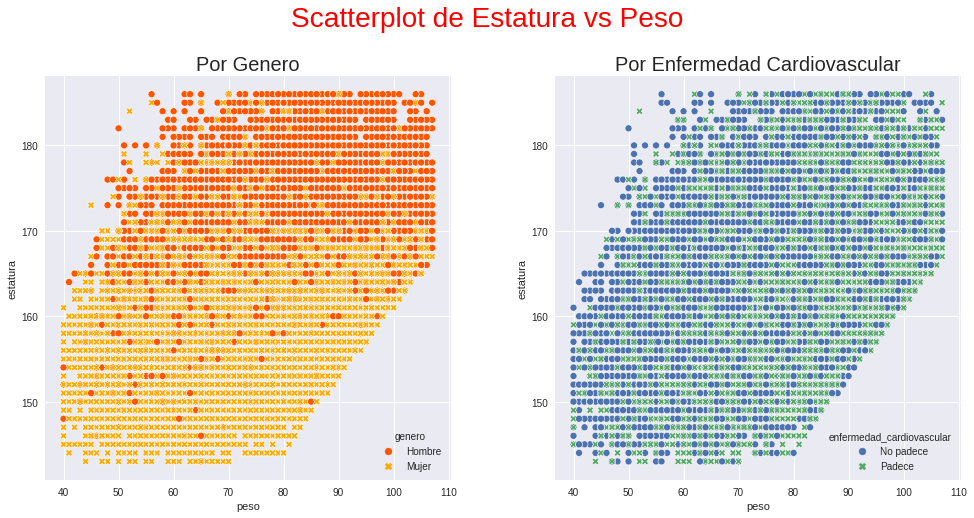

In [ ]:
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(1, 2, sharex = False, sharey = False)

fig.suptitle('Scatterplot de Estatura vs Peso', fontsize=28, color= 'r');

sns.scatterplot(data= df_final_2,x='peso', y='estatura', hue='genero', style='genero', ax = axes[0], palette='autumn');
axes[0].set_title('Por Genero', fontsize=20);

sns.scatterplot(data= df_final_2,x='peso', y='estatura', hue='enfermedad_cardiovascular', style='enfermedad_cardiovascular', ax = axes[1]);
axes[1].set_title('Por Enfermedad Cardiovascular', fontsize=20);

fig.tight_layout(pad=6)


Como era de esperar al compara el peso vs altura por genero podemos visualizar que los hombres presentan mayor peso como altura a comparacion de las mujeres.

Como se observa en el segundo scatterplot podemos decir que una enfermedad cardiovascular no presenta una relacion directa con el peso y esstatura, ya que los datos de padecer enfermedad se encuentran dispersos en todo el grafico

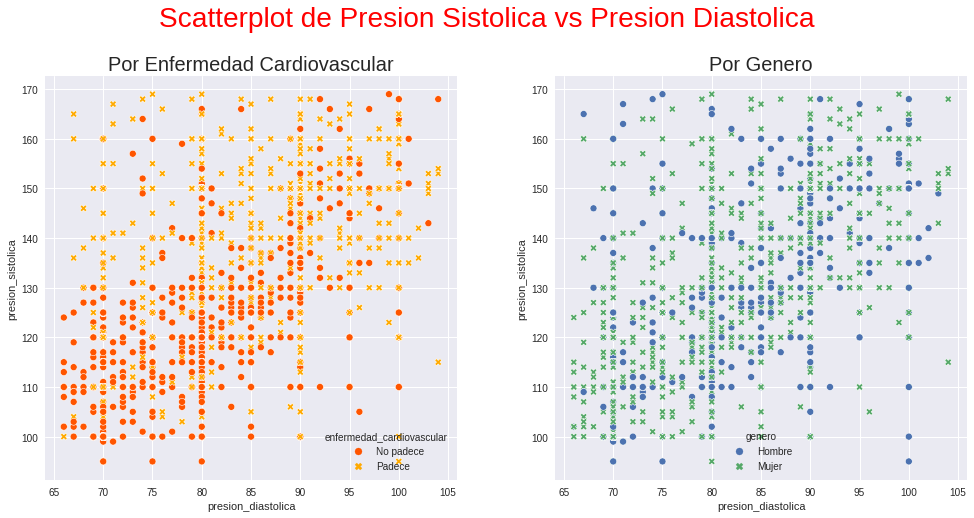

In [ ]:
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(1, 2, sharex = False, sharey = False)

fig.suptitle('Scatterplot de Presion Sistolica vs Presion Diastolica', fontsize=28, color= 'r');

sns.scatterplot(data= df_final_2,x='presion_diastolica', y='presion_sistolica', hue='enfermedad_cardiovascular', style='enfermedad_cardiovascular', ax = axes[0], palette='autumn');
axes[0].set_title('Por Enfermedad Cardiovascular', fontsize=20);

sns.scatterplot(data= df_final_2,x='presion_diastolica', y='presion_sistolica', hue='genero', style='genero', ax = axes[1]);
axes[1].set_title('Por Genero', fontsize=20);

fig.tight_layout(pad=6)

Como se observa podemos inferir que las personas que padecen una enfermedad cardiaca  presentan mas una **presion sistolica**

En el caso del genero podemos ver que la distribucion de los datos es casi la misma en ambos generos por lo que le sexo no influye en padecer una enfermedad cardiovascular

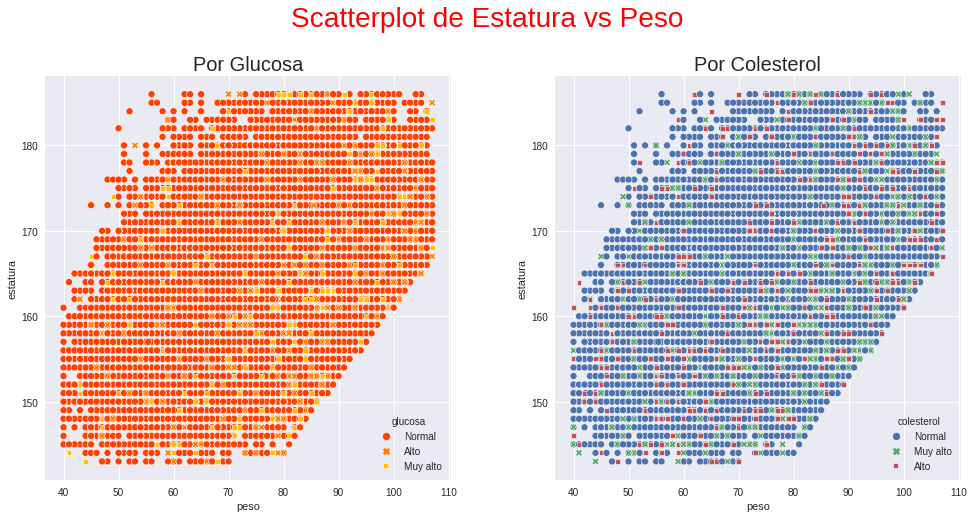

In [ ]:
fig = plt.figure(figsize = (12, 8))
axes = fig.subplots(1, 2, sharex = False, sharey = False)

fig.suptitle('Scatterplot de Estatura vs Peso', fontsize=28, color= 'r');

sns.scatterplot(data= df_final_2,x='peso', y='estatura', hue='glucosa', style='glucosa', ax = axes[0],palette='autumn');
axes[0].set_title('Por Glucosa', fontsize=20);

sns.scatterplot(data= df_final_2,x='peso', y='estatura', hue='colesterol', style='colesterol', ax = axes[1]);
axes[1].set_title('Por Colesterol', fontsize=20);

fig.tight_layout(pad=6)

En el caso de peso vs estatura ya sea por glucosa o colesterol no vemos una relacion, podemos ver que es muy presente el valor Normal en ambas variables en todos los pesos y alturas

#### scaterplots con variables condicionantes

Los scatterplot con variables condicionantes mas que nada nos sirve para un anlisis multivariables o poder ver mejor una distribucion deividica por una variable categorica

<Figure size 1080x576 with 0 Axes>

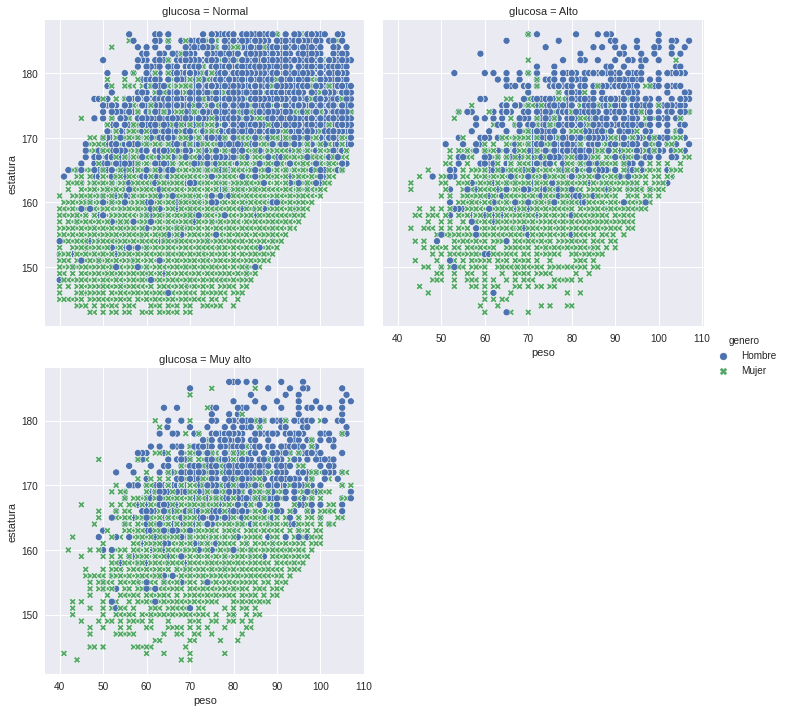

In [ ]:
fig = plt.figure(figsize = (15, 8))
fig.suptitle('Scatterplot Peso vs Estatura por Genero y ', fontsize=28, color= 'r');

sns.relplot(data=df_final_2, x='peso', y='estatura', kind='scatter', hue='genero',style='genero',col='glucosa', col_wrap=2);

fig.tight_layout(pad=6)

Como se observa podemos apresiar mejor las distribuciones del peso vs estaura dependiendo del valor de la glucosa, ademas de poder evaluar por genero

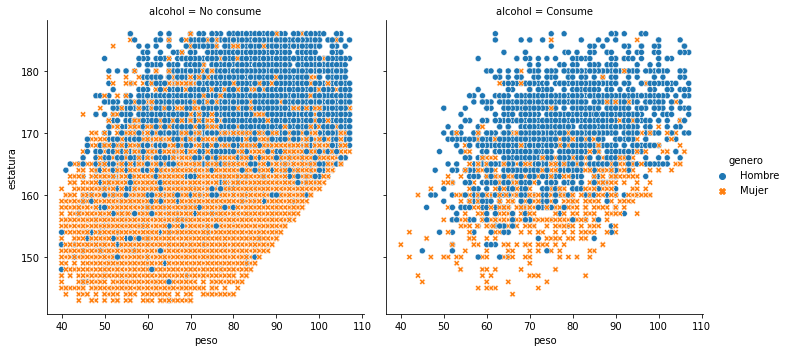

In [ ]:
sns.relplot(data=df_final_2, x='peso', y='estatura', kind='scatter', hue='genero',style='genero',col='alcohol', col_wrap=2);

### Binnings Hexagonales

Los binnings Hexagonales nos siven mas que nada para observar donde se encuentra mas concentrada la distibucion de los datos mediante una degradacion de color.

<Figure size 1440x576 with 0 Axes>

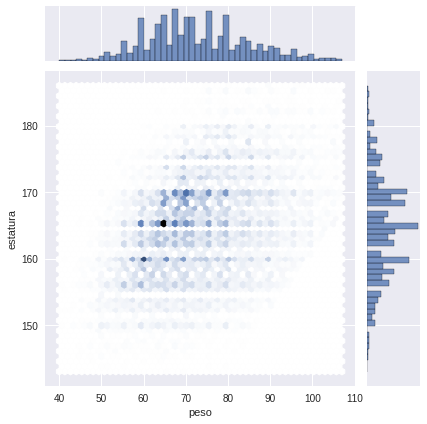

In [ ]:
fig = plt.figure(figsize = (20, 8))
sns.jointplot(x='peso', y='estatura', data=df_final_2, kind='hex', ratio=5, joint_kws={'gridsize': 50}, marginal_kws={'bins':50});


Se puede verificar donde se encuentra la mayor cantidad de datos de la relacion peso vs estatura que anda rondando entre un pesor 62-68 kg y una altura de 162 -168 m.

Con el binning hexgonal podemos ver con mas claridad donde se encuentran concentrados los datos al contrario de un Scatterplot

<Figure size 1440x576 with 0 Axes>

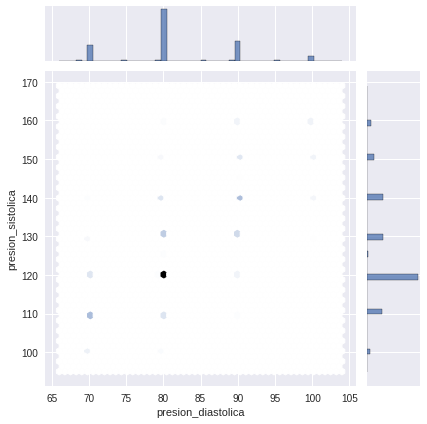

In [ ]:
fig = plt.figure(figsize = (20, 8))
sns.jointplot(x='presion_diastolica', y='presion_sistolica', data=df_final_2, kind='hex', ratio=5, joint_kws={'gridsize': 50}, marginal_kws={'bins':50});


comparando ambas presiones podemos ver que los datos estan muy pero muy concentrados en un punto y que los demas podrian considerarse personas que padecieron de algun problema de la presion en el momento en que se la registraron.

<Figure size 1440x576 with 0 Axes>

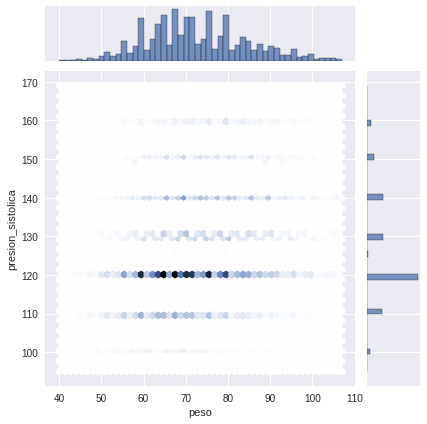

In [ ]:
fig = plt.figure(figsize = (20, 8))
sns.jointplot(x='peso', y='presion_sistolica', data=df_final_2, kind='hex', ratio=5, joint_kws={'gridsize': 50}, marginal_kws={'bins':50});


En esta grafica podemos ver que la mayoria de personas presentan una presion sistolica alrededor de la medicion de 120 lo que indica que tienen una presion normal

### Barras apiladas

Este tipo de grafico nos permite observar una variable numerica segementada por dos variable categoricas, permitiendo ver disparidades entre los datos.

In [ ]:
df_final_2['count'] = 1
df_final_2.head()

para esto necesitamos agrupar las dos variables categoricas que queremos apilar en una grafica, en este caso la numerica sera una sumatoria de los datos segun las variables categoricas agrupadas

In [ ]:
value_counts = df_final_2.groupby(['enfermedad_cardiovascular', 'genero'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

genero                     Hombre  Mujer
enfermedad_cardiovascular               
No padece                   11024  20010
Padece                      10489  19123

Ahora procedemos a graficar mediante la funcion `bar()`, para poder apilar las graficas se usa el parametro `bottom=value_counts[]` despues de la primera grafica para poder sumarla.

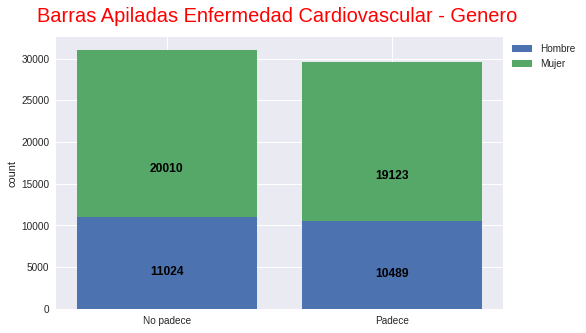

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['Hombre'], label='Hombre')
plt2 = ax.bar(value_counts.index, value_counts['Mujer'], bottom=value_counts['Hombre'], label='Mujer')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Enfermedad Cardiovascular - Genero ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2 in zip(plt1, plt2):
    h1 = r1.get_height()
    h2 = r2.get_height()

    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

se observa que la cantidad de mujeres como de hombre de ambos grupos de si padecen o no una enfermedad cardiovascular estan muy cercanas

In [ ]:
value_counts = df_final_2.groupby(['enfermedad_cardiovascular', 'colesterol'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

colesterol                 Alto  Muy alto  Normal
enfermedad_cardiovascular                        
No padece                  3234      1625   26175
Padece                     4631      5070   19911

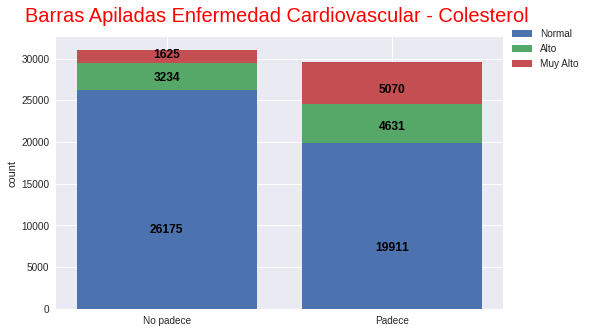

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['Normal'], label='Normal')
plt2 = ax.bar(value_counts.index, value_counts['Alto'], bottom=value_counts['Normal'], label='Alto')
plt3 = ax.bar(value_counts.index, value_counts['Muy alto'], bottom=value_counts['Normal']+value_counts['Alto'], label='Muy Alto')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Enfermedad Cardiovascular - Colesterol ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2, r3 in zip(plt1, plt2, plt3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 5., "%d" % h3, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

En el caso de las persnas que padecen una enfermedad, tienen mas problemas en lo que es el colesterol

In [ ]:
value_counts = df_final_2.groupby(['enfermedad_cardiovascular', 'glucosa'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

glucosa                    Alto  Muy alto  Normal
enfermedad_cardiovascular                        
No padece                  1777      1758   27499
Padece                     2384      2759   24469

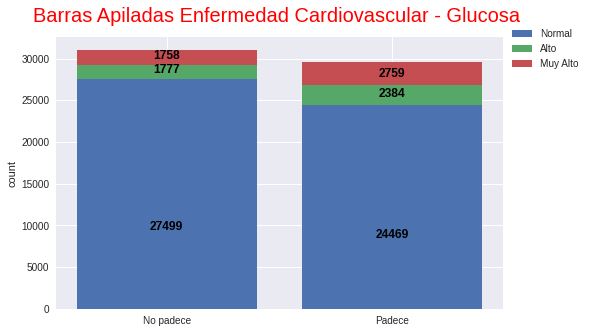

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['Normal'], label='Normal')
plt2 = ax.bar(value_counts.index, value_counts['Alto'], bottom=value_counts['Normal'], label='Alto')
plt3 = ax.bar(value_counts.index, value_counts['Muy alto'], bottom=value_counts['Normal']+value_counts['Alto'], label='Muy Alto')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Enfermedad Cardiovascular - Glucosa ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2, r3 in zip(plt1, plt2, plt3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 5., "%d" % h3, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

los valores no cambian mucgo entre ambos grupos

In [ ]:
value_counts = df_final_2.groupby(['enfermedad_cardiovascular', 'act_fisica'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

act_fisica                 No realiza  Realiza
enfermedad_cardiovascular                     
No padece                        5618    25416
Padece                           6228    23384

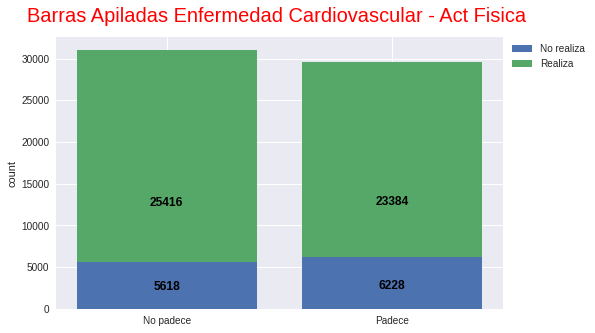

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['No realiza'], label='No realiza')
plt2 = ax.bar(value_counts.index, value_counts['Realiza'], bottom=value_counts['No realiza'], label='Realiza')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Enfermedad Cardiovascular - Act Fisica ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2 in zip(plt1, plt2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

la Actividad fisica no influye en una enfermedad cardiovascular, lo que si podemos observar es que las personas que practican actividad fisica en  su vida son casi todos

In [ ]:
value_counts = df_final_2.groupby(['enfermedad_cardiovascular', 'tabaco'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

tabaco                     Fuma  No fuma
enfermedad_cardiovascular               
No padece                  2897    28137
Padece                     2412    27200

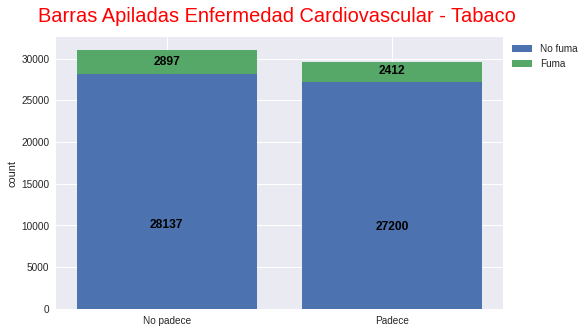

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['No fuma'], label='No fuma')
plt2 = ax.bar(value_counts.index, value_counts['Fuma'], bottom=value_counts['No fuma'], label='Fuma')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Enfermedad Cardiovascular - Tabaco ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2 in zip(plt1, plt2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

no influye el tabaco y muy pocas personas fuman

In [ ]:
value_counts = df_final_2.groupby(['enfermedad_cardiovascular', 'alcohol'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

alcohol                    Consume  No consume
enfermedad_cardiovascular                     
No padece                     1708       29326
Padece                        1457       28155

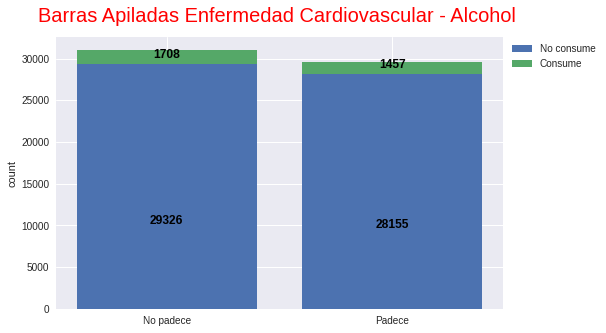

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['No consume'], label='No consume')
plt2 = ax.bar(value_counts.index, value_counts['Consume'], bottom=value_counts['No consume'], label='Consume')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Enfermedad Cardiovascular - Alcohol ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2 in zip(plt1, plt2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

In [ ]:
value_counts = df_final_2.groupby(['genero', 'colesterol'])['count'].sum()
value_counts = value_counts.unstack(1)
value_counts

colesterol  Alto  Muy alto  Normal
genero                            
Hombre      2606      2087   16820
Mujer       5259      4608   29266

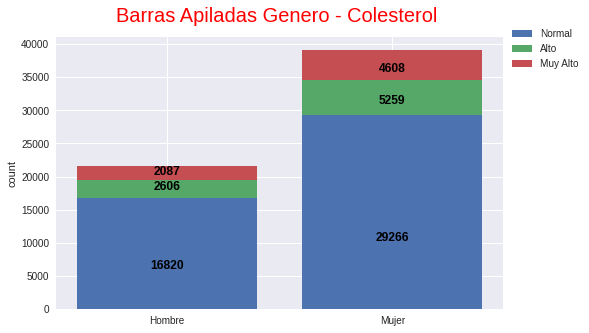

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()

plt1 = ax.bar(value_counts.index, value_counts['Normal'], label='Normal')
plt2 = ax.bar(value_counts.index, value_counts['Alto'], bottom=value_counts['Normal'], label='Alto')
plt3 = ax.bar(value_counts.index, value_counts['Muy alto'], bottom=value_counts['Normal']+value_counts['Alto'], label='Muy Alto')

ax.set_ylabel('count')
ax.set_title('Barras Apiladas Genero - Colesterol ', c='r', fontsize=20, pad=15);
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.85));
 
for r1, r2, r3 in zip(plt1, plt2, plt3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 3., "%d" % h1, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 4., "%d" % h2, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 5., "%d" % h3, ha="center", va="bottom", color="black", fontsize=12, fontweight="bold")

plt.show()

las mujeres pareciera que sufren mas de colesterol pero esto puede ser devido a que la moyoria de los datos son de mujeres

## Postwork 7 - Pruebas A/B y Procesamiento de Lenguaje Natural





Para realizar este Postwork requerimos información no estructurada, por tal motivo utilizamos un data set diferente, relativo a 70 mil opiniones de personas respecto a diversas aplicaciones de Google Playstore.

In [ ]:
df_google = pd.read_csv('https://raw.githubusercontent.com/IsmaelOr/Proyecto_Fase3_Modulo1_Equipo9/main/Files/googleplaystore_user_reviews.csv', index_col = 0)

df_google.head()

Translated_Review  ... Sentiment_Subjectivity
App                                                                       ...                       
10 Best Foods for You  I like eat delicious food. That's I'm cooking ...  ...               0.533333
10 Best Foods for You    This help eating healthy exercise regular basis  ...               0.288462
10 Best Foods for You                                                NaN  ...                    NaN
10 Best Foods for You         Works great especially going grocery store  ...               0.875000
10 Best Foods for You                                       Best idea us  ...               0.300000

[5 rows x 4 columns]

Al analizar este nuevo dataset encontramos varias celdas con Nans por lo que procedimos a eliminarlos y así obtener una base de datos limpia.

In [ ]:
df_google = df_google.dropna()

df_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Translated_Review       37427 non-null  object 
 1   Sentiment               37427 non-null  object 
 2   Sentiment_Polarity      37427 non-null  float64
 3   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


El siguiente paso fue agrupar las opiniones por el nombre de la aplicación de Playstore

In [ ]:
grouped_by_app = df_google.groupby('App')['Translated_Review'].last()
grouped_by_app

App
10 Best Foods for You                                                                 Its ok I love ok.
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                                                                   Nice
11st                                                                        Don't English language like
1800 Contacts - Lens Store                                       This well designed, easy & convenient!
1LINE – One Line with One Touch                       Terrible amount ads covering content making un...
                                                                            ...                        
Hotels.com: Book Hotel Rooms & Find Vacation Deals    Mobile currently crashing. Their international...
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                                     Good
Hotstar                                               Very bad I playing Kannada dha kotyadhipathi I...
Hotwire Hotel & Car Rental App                        Keeps 

Después procedimos a limpiar nuestra información no estructurada por medio de patrones REGEX:

*   Quitando mayúsculas
*   Removiendo espacios
*   Quitando signos de puntuación


In [ ]:
grouped_by_app = grouped_by_app.str.lower()
grouped_by_app = grouped_by_app.str.strip()
grouped_by_app = grouped_by_app.str.replace('[^\w\s]', '')
grouped_by_app = grouped_by_app.str.replace('\d', '')
grouped_by_app = grouped_by_app.str.replace('\\n', '')
grouped_by_app = grouped_by_app.dropna()

grouped_by_app

App
10 Best Foods for You                                                                  its ok i love ok
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                                                                   nice
11st                                                                         dont english language like
1800 Contacts - Lens Store                                          this well designed easy  convenient
1LINE – One Line with One Touch                       terrible amount ads covering content making un...
                                                                            ...                        
Hotels.com: Book Hotel Rooms & Find Vacation Deals    mobile currently crashing their international ...
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                                     good
Hotstar                                               very bad i playing kannada dha kotyadhipathi i...
Hotwire Hotel & Car Rental App                        keeps 

A continuación hicimos una búsqueda de la palabra "fun" para ver que aplicaciones les parecen divertidas a las personas.

In [ ]:
grouped_by_app[grouped_by_app.str.contains('fun', case = False)]

App
4 in a Row                                            ive played level  three times them then i prog...
Account Manager                                       all pakistian like it why could make mobile ph...
Adobe Photoshop Express:Photo Editor Collage Maker    photo shop very basic photo adjustments color ...
Angry Birds Rio                                       the latest update pain ass  what made game fun...
Barbie Magical Fashion                                it fashionable this game nice fashionable grea...
Battlelands Royale                                    great little game only criticism would difficu...
Best Fiends - Free Puzzle Game                        everyone best fiends its relaxing fun entertai...
BiggerCity: Chat for gay bears, chubs & chasers       i i finally decided upgrade i read charges i a...
Bowmasters                                            its fun short round pvp ridiculously gruesome ...
Bubble Shooter Genies                                       

Utilizamos la función TOKENIZED para separar palabra por palabra de nuestro texto y generamos un objeto TEXT con la librería "nltk" para explorar los contextos de las palabras "fun" y "boring" y así poder analizar las aplicaciones que fueron calificadas como divertidas o aburridas por los usuarios; así como palabras con un contexto similar.

In [ ]:
tokenized = grouped_by_app.apply(nltk.word_tokenize)
tokenized

App
10 Best Foods for You                                                            [its, ok, i, love, ok]
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                                                                 [nice]
11st                                                                    [dont, english, language, like]
1800 Contacts - Lens Store                                     [this, well, designed, easy, convenient]
1LINE – One Line with One Touch                       [terrible, amount, ads, covering, content, mak...
                                                                            ...                        
Hotels.com: Book Hotel Rooms & Find Vacation Deals    [mobile, currently, crashing, their, internati...
Hotspot Shield Free VPN Proxy & Wi-Fi Security                                                   [good]
Hotstar                                               [very, bad, i, playing, kannada, dha, kotyadhi...
Hotwire Hotel & Car Rental App                        [keeps

In [ ]:
all_words = tokenized.sum()
text = nltk.Text(all_words)

text

<Text: its ok i love ok nice dont english...>

In [ ]:
text.concordance('fun', lines = 20)
text.concordance('boring', lines = 20)

Displaying 20 of 30 matches:
always blurred final edited photos no fun extras addons ive used years evo g ga
latest update pain ass what made game fun simplicity need free shows nice amazi
 great game really make make necklace fun maybe ok easy navigate works well a w
e only criticism would difficult earn fun custom stuff without paying lot money
 be everyone best fiends its relaxing fun entertaining addictive game love colo
ervice made mistake choosing this its fun short round pvp ridiculously gruesome
 tries force buy anything cool pretty fun enjoyable game fun game has froze yet
ything cool pretty fun enjoyable game fun game has froze yet im normally type p
 pretty simple average game enjoyable fun i end playing lot awesome bad load be
nt listen people says boring many ads fun hardly ads pop upi recommend game sup
rdly ads pop upi recommend game super fun relaxing keeps busy hours very conven
 should lives i cant leave game alone fun new version wrist copy tags sweet sel
ool playing

In [ ]:
text.similar('fun')
text.similar('boring')

ive game games best why that must
fashionable


Utilizamos la función FreqDist para hacer un análisis estadístico de la riqueza y distribución de las palabras contenidas en el dataset. Obteniendo un total de 10598 palabras y 2967 palabras únicas.

In [ ]:
freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 2967 samples and 10598 outcomes>


Enseguida, hicimos una exploración de las palabras obtenidas y los bigramas más comunes.

In [ ]:
text.collocations()

please fix; many ads; waste time; every time; stopped working; using
years; latest update; user friendly; works fine; keeps crashing; years
ago; full review; long time; stick man; easy use; upload photos;
remove ads; play store; create account; maintain innovate


In [ ]:
freq_dist.most_common(50)

[('i', 454),
 ('it', 131),
 ('game', 121),
 ('good', 116),
 ('the', 106),
 ('great', 101),
 ('app', 98),
 ('like', 87),
 ('this', 85),
 ('love', 83),
 ('time', 71),
 ('its', 65),
 ('get', 58),
 ('ads', 50),
 ('very', 49),
 ('need', 46),
 ('really', 45),
 ('update', 44),
 ('not', 43),
 ('nice', 41),
 ('best', 40),
 ('even', 40),
 ('phone', 39),
 ('ive', 38),
 ('cant', 38),
 ('way', 37),
 ('would', 37),
 ('much', 36),
 ('im', 36),
 ('you', 35),
 ('many', 35),
 ('please', 35),
 ('new', 34),
 ('using', 33),
 ('to', 33),
 ('keep', 32),
 ('make', 32),
 ('so', 32),
 ('still', 32),
 ('easy', 31),
 ('free', 31),
 ('work', 31),
 ('fun', 30),
 ('problem', 29),
 ('a', 29),
 ('well', 28),
 ('play', 28),
 ('could', 28),
 ('go', 27),
 ('fix', 27)]

Utilizamos la función stopwords para eliminar las palabras más comunes que no aportan información relevante y después procedimos a graficar las frecuencias de distribución de palabras y bigramas más utilizados sin las "stopwords". A partir de esta información ya podemos apreciar que las personas callifican las aplicaciones de Playstore como buenas en diversos grados: "good", "great", "like", "love", "amazing", "better"; y que muestran ciertas necesidades como consumidores tales como: "ads" (remover anuncios), "fix", "work", "problem", "update" (solucionar algún problema de funcionamiento) y palabras como "money", "free" que expresan la preocupación por el costo de la aplicación.

In [ ]:
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)
print(freq_dist_no_stop_words)

<FreqDist with 2865 samples and 8876 outcomes>


In [ ]:
freq_dist_no_stop_words.most_common(50)

[('game', 121),
 ('good', 116),
 ('great', 101),
 ('app', 98),
 ('like', 87),
 ('love', 83),
 ('time', 71),
 ('get', 58),
 ('ads', 50),
 ('need', 46),
 ('really', 45),
 ('update', 44),
 ('nice', 41),
 ('best', 40),
 ('even', 40),
 ('phone', 39),
 ('ive', 38),
 ('cant', 38),
 ('way', 37),
 ('would', 37),
 ('much', 36),
 ('im', 36),
 ('many', 35),
 ('please', 35),
 ('new', 34),
 ('using', 33),
 ('keep', 32),
 ('make', 32),
 ('still', 32),
 ('easy', 31),
 ('free', 31),
 ('work', 31),
 ('fun', 30),
 ('problem', 29),
 ('well', 28),
 ('play', 28),
 ('could', 28),
 ('go', 27),
 ('fix', 27),
 ('back', 26),
 ('better', 25),
 ('every', 24),
 ('lot', 24),
 ('times', 23),
 ('version', 23),
 ('money', 23),
 ('see', 23),
 ('want', 22),
 ('amazing', 21),
 ('also', 21)]

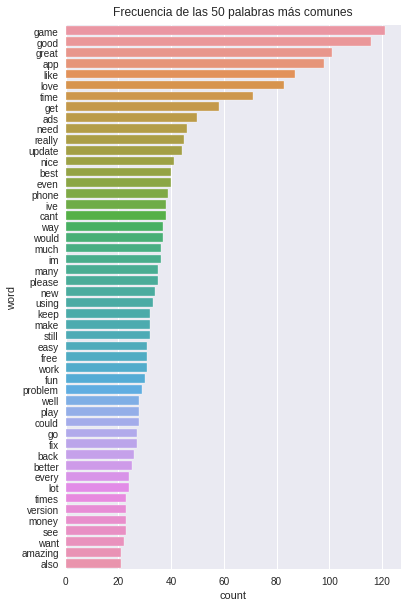

In [ ]:
most_common_50 = pd.DataFrame(freq_dist_no_stop_words.most_common(50), columns = ['word', 'count'])
fig = plt.figure(figsize = (6, 10))
ax = fig.add_subplot()
sns.barplot(data = most_common_50, y = 'word', x = 'count', ax = ax);
ax.set_title('Frecuencia de las 50 palabras más comunes', pad = 10);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



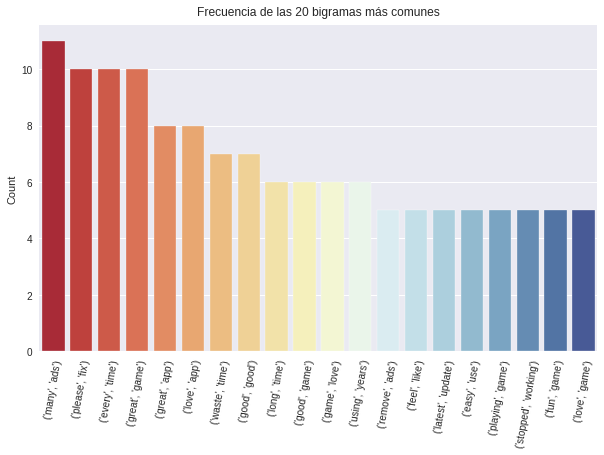

In [ ]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot()

sns.barplot(x = most_common_20[:, 0], y = most_common_20[:, 1], ax = ax, palette = 'RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad = 10)
ax.set_ylabel('Count')
ax.tick_params(axis = 'x', rotation = 80);

Realizamos también visualizaciones de las distribuciones de frecuencias de las longitudes de las palabras y de las oraciones.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



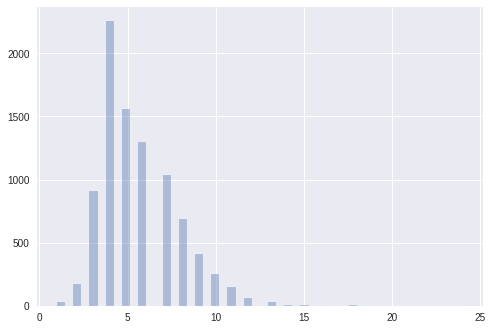

In [ ]:
word_lengths = [len(w) for w in all_words_except_stop_words];
sns.distplot(x = word_lengths, kde = False, norm_hist = False);
plt.title('Frecuencias de la longitud de palabras');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



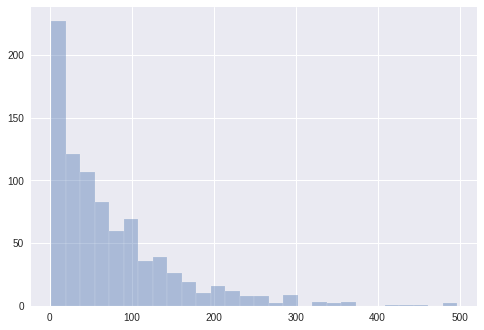

In [ ]:
sentence_lengths = grouped_by_app.apply(lambda x: len(x));
sns.distplot(x = sentence_lengths, kde = False, norm_hist = False);
plt.title('Frecuencias de la longitud de oraciones')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



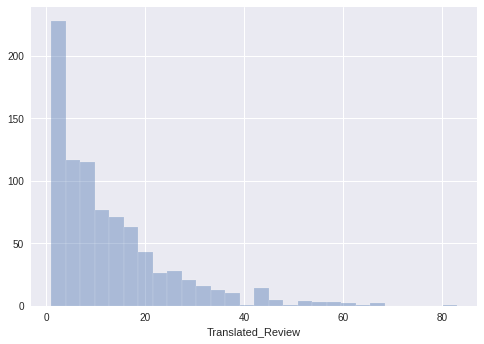

In [ ]:
num_of_words = grouped_by_app.str.split(' ').str.len()
sns.distplot(num_of_words, kde = False, norm_hist = False);
plt.title('Frecuencia de la cantidad de palabras por oración')

Realizamos una nube de palabras para detectar los temas más importantes del conjunto de datos. Resaltan las palabras "app", "good", "game", "great" y "love", entre otras.

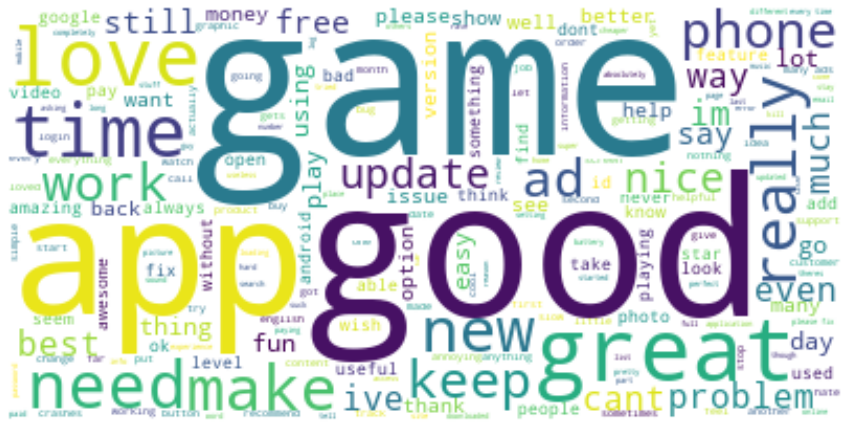

In [ ]:
wordcloud = WordCloud(max_font_size = 100, background_color = "white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize = (15, 15))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Finalmente realizamos un "análisis de Sentimiento" para comparar las diferentes aplicaciones y opiniones de los consumidores como positivas (valores cercanos a 1), neutras (valores cercanos a 0) o negativas (valores cercanos a -1).

In [ ]:
analizador = SentimentIntensityAnalyzer()

In [ ]:
df_google['analisis'] = df_google['Translated_Review'].apply(lambda x:analizador.polarity_scores(x)['compound'])
df_google.sort_values('Sentiment_Polarity', ascending = False)

Translated_Review  ... analisis
App                                                                                                    ...         
10 Best Foods for You                               I like eat delicious food. That's I'm cooking ...  ...   0.9531
CMB Free Dating App                                                                            Great!  ...   0.6588
CMB Free Dating App                                                             Best dating app/site.  ...   0.6369
CM Locker - Security Lockscreen                                      I think best screen locker apps.  ...   0.6369
CM Locker - Security Lockscreen                     It goo app.cm secuirty best lockscreen secuirety.  ...   0.6369
...                                                                                               ...  ...      ...
Hide App, Private Dating, Safe Chat - PrivacyHider                             Very worst I ever used  ...  -0.6590
Candy Camera - selfie, beauty camera, photo editor                                    This worst life  ...  -0.6249
Fashion in Vogue                                                   terrible, doesnt load, uninstalled  ...  -0.4767
Candy Camera - selfie, beauty camera, photo editor                Worst app...not work Lenovo k8 plus  ...  -0.6249
Amtrak                                                             Horrible - button clicks even work  ...  -0.5423

[37427 rows x 5 columns]

## Postwork 8 - Introducción a Machine Learning: Clasificación No Supervisada y Supervisada



Regresando a nuestro proyecto original, en este Postwork atendimos un problema de clasificación binaria y entrenamos un modelo de Regresión Logística con el dataset. Para ello utilizamos la variable binaria 'enfermedad_cardiovascular', la cual nos permite predecir con el dataset si una persona es sana (valor=0) o tiene una enfermedad cardiovascular (valor=1).

In [ ]:
df_final['enfermedad_cardiovascular'].unique()

array([0, 1])

Para la realización del modelo primero utilizamos como valor de "X" el dataset sin la variable dependiente, en este caso 'enfermedad_cardiovascular' y como "Y" utilizamos el valor de dicha variable.

In [ ]:
X = df_final.drop(columns = ['enfermedad_cardiovascular'])
y = df_final['enfermedad_cardiovascular']

A continuación hicimos el modelo de regresión con un tamaño del 30% como prueba y 70% como entrenamiento, con un total de 10 mil iteraciones, obteniendo un score aproximado de 72%.

Dentro de los problemas que tuvimos es que algunas variables como la glucosa y el colesterol son categóricas por lo que los resultados podrían haber sido más exactos si dichas variables fueran numéricas.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
logreg = LogisticRegression(max_iter = 10000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
logreg.score(X_test, y_test)

0.7229855996482357

Como paso siguiente evalúamos el modelo de Regresión Logística utilizando matriz de confusión; medidas de precisión, exactitud, sensibilidad y especificidad; y curva ROC / AUC.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[7319, 1998],
       [3042, 5835]])

Text(0.5, 1.0, 'Matriz de confusión')

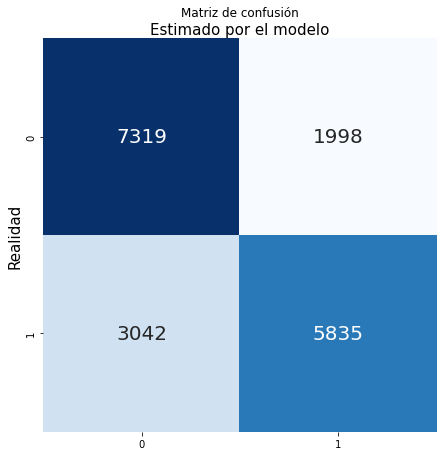

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);
plt.title('Matriz de confusión')

Como se puede apreciar, la matriz de confusión nos entrega que nuestro modelo obtuvo los siguentes datos:


*   Verdaderos positivos: 5739
*   Verdaderos negativos: 7390
*   Falsos positivos: 1930
*   Falsos negativos: 3135


Nuestro modelo no es 100% exacto por la situación antes comentada de las variables categóricas, sin embargo consideramos que da un resultado aceptable, ya que tiene un promedio mayor al 70% de confiabilidad, esto lo comprobamos a continuación con las siguientes medidas de precisión, exactitud, sensibilidad y especificidad.

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7517994858611825
Exactitud: 0.7227107837748709
Sensibilidad: 0.6525716835880844
Especificidad: 0.7908135629942584


Finalmente realizamos el procedimiento para la obtención de la curva ROC/AUC en la cuál obtuvimos un área bajo la curva cercana al 80% lo cual indica que nuestro modelo sirve para predecir la enfermedad cardiovascular de manera aceptable, ya que está más próximo al valor de 1.

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.50817445, 0.49182555],
       [0.60610322, 0.39389678],
       [0.45151667, 0.54848333],
       [0.35935505, 0.64064495],
       [0.3788582 , 0.6211418 ],
       [0.6774938 , 0.3225062 ],
       [0.64869589, 0.35130411],
       [0.82556706, 0.17443294],
       [0.43083836, 0.56916164],
       [0.11253373, 0.88746627]])

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

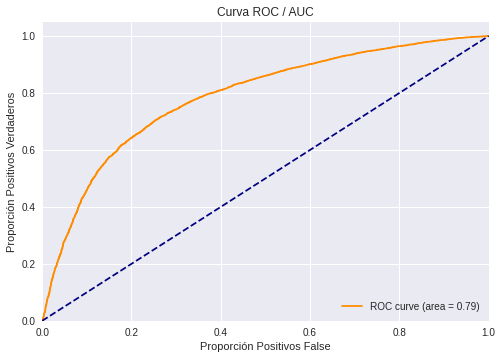

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Regresión logística sólo con variables numéricas

A su vez, realizamos todo este procedimiento nuevamente en el dataset pero quitando las variables categóricas para verificar que tanta influencia tenían en el modelo. Sin embargo los resultados fueron muy similares, con una confiabilidad un poco menor que la anterior por lo que, consideramos que es más exacto el modelo que incluye todas las variables.



In [ ]:
var_categoricas_2 = ['genero', 'colesterol', 'glucosa', 'tabaco', 'alcohol', 'act_fisica']
df_sin_categoricas = df_final.drop(columns = var_categoricas_2)

In [ ]:
X = df_sin_categoricas.drop(columns = ['enfermedad_cardiovascular'])
y = df_sin_categoricas['enfermedad_cardiovascular']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
logreg = LogisticRegression(max_iter = 10000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
logreg.score(X_test, y_test)

0.7128174123337364

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[7271, 1976],
       [3249, 5698]])

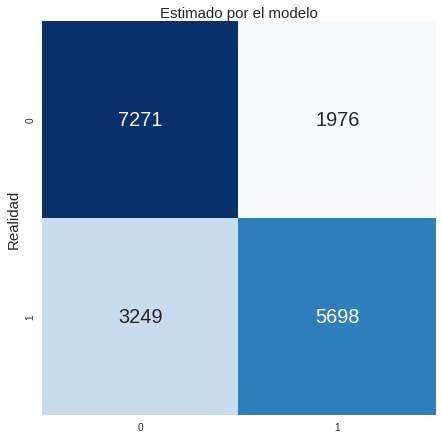

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7425071670575971
Exactitud: 0.7128174123337364
Sensibilidad: 0.6368615178272047
Especificidad: 0.786309073212934


In [ ]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.54683894, 0.45316106],
       [0.58142922, 0.41857078],
       [0.2203086 , 0.7796914 ],
       [0.14619546, 0.85380454],
       [0.19315011, 0.80684989],
       [0.88663529, 0.11336471],
       [0.71898915, 0.28101085],
       [0.03915227, 0.96084773],
       [0.73760451, 0.26239549],
       [0.37602218, 0.62397782]])

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

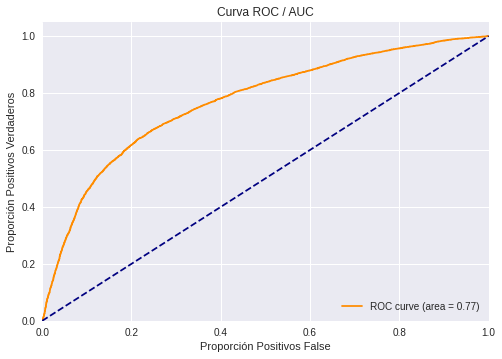

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()